In [2]:
import numpy as np
import os
from utils2 import * 
import skimage.io as io
import sys
sys.stdout = open('prints.txt', 'w')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from IPython import display
args = {
        "path": "/asap3/petra3/gpfs/p05/2023/data/11016663//processed/thomas_001_d150/flat_corrected/rawBin2/",
        "idx": 89,
        "energy_kev": 18.0,
        "detector_pixel_size": 2.57 * 1e-6,
        "distance_sample_detector": 0.15,
        "alpha": 1e-8,
        "delta_beta": 1,
        "pad": 1,
        "method": 'TIE',
        'iter_num': 500,
        'conv_num': 32,
        'conv_size': 3,
        'dropout': 0.25,
        'l1_ratio': 10,
        'abs_ratio': 1.0,
        'g_learning_rate': 1e-3,
        'd_learning_rate': 1e-5,
        'phase_only': False,
        'save_wpath': None,
        'init_wpath': None,
        'init_model': False,
        'recon_monitor': True,
        'seed': 42,
        'filter': True,
        'generator': None,
        'discriminator': None,
        'filter_optimizer': None,
        'generator_optimizer': None,
        'discriminator_optimizer': None,
    }


In [3]:

def plot_or_show_images(images, rows = 1, cols = 5, show_or_plot = 'plot', random = True, cmap = 'None', figsize = (20, 20), title = ''):
    #if images is a pandas dataframe, convert to numpy array
        
    if len(images) == 0:
        print("no images to plot")
        return None
    elif len(images) == 1:
        rows = 1
        cols = 1
    elif len(images) < rows*cols:
        rows = 1
        cols = len(images)
    else:
        pass
    #generate random numbers rows*cols times and take the images with the random numbers
    random_numbers = np.random.randint(0, len(images), rows*cols)
    if random:
        images = [images[i] for i in random_numbers]
    else:
        images = images[:rows*cols]

    #if images are complex, take the absolute value
    if np.iscomplexobj(images[0]):
        #exponent the images
        
        # images = [np.exp(np.imag(image) - np.real(image)) for image in images]
        images = [np.abs(image) for image in images]
        # print("images are complex, taking the np.exp(imag - real) value")

    #if the images is 4D, 
    if len(images[0].shape) == 4:
        shape = images[0].shape
        if shape[0] > shape[1] and shape[0] > shape[2]:
            images = [image[0, :, :, 0] for image in images]
        elif shape[2] > shape[0] and shape[2] > shape[1]:
            images = [image[:, :, 0, 0] for image in images]
        else:
            images = [images[0,:,:,0] for image in images]
        images = [image[0,:, :, 0] for image in images]

    shape = images[0].shape
    if rows == 1 and cols == 1:
        figsize = (10,10)
        fig = plt.figure(figsize=figsize)
        plt.imshow(images[0]) if show_or_plot == 'show' else plt.plot(images[0][shape[0]//2, :])
        plt.axis('on')
        if random:
            plt.title('min: ' + str(np.min(images))[:6] + ' max: ' + str(np.max(images))[:6] + 'im_' + str(random_numbers[0]), fontsize = 12)
        else:
            plt.title('min: ' + str(np.min(images))[:6] + ' max: ' + str(np.max(images))[:6], fontsize = 12)
        if title != '':
            plt.title(title)
        #if cmap is 
        fig.colorbar(plt.imshow(images[0])) if show_or_plot == 'show' else None
        plt.gray()
        plt.show()
        return None
    
    figsize = (shape[1]*cols/100, shape[0]*rows/100)
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    if rows == 1:
        counter = 0
        for j in range(cols):
            if show_or_plot == 'show':
                if np.iscomplexobj(images[j]):
                    ax[j].imshow(np.exp(np.imag(images[j]) - np.real(images[j])))
                else:
                    ax[j].imshow(images[j])
                ax[j].axis('on')
                if random:
                    if title == '':
                        title = 'min: ' + str(np.min(images[j]))[:6] + ' max: ' + str(np.max(images[j]))[:6] + 'im_' + str(random_numbers[counter])

                    if type(title) == list:
                        title = title[counter]
                    if type(title) == str and title != '':
                        title = title + '_im_' + str(random_numbers[counter])
                else:
                    title = 'min: ' + str(np.min(images[j]))[:6] + ' max: ' + str(np.max(images[j]))[:3]
                ax[j].set_title(title, fontsize = 12)
                ax[j].axis('off')
                fig.colorbar(ax[j].imshow(images[j]), ax=ax[j])
                
            elif show_or_plot == 'plot':    
                if np.iscomplexobj(images[j]):
                    ax[j].plot((np.exp(np.imag(images[j]) - np.real(images[j])))[shape[0]//2, :])
                else:
                    ax[j].plot(images[j][shape[0]//2, :])
                ax[j].axis('on')
                if random:
                    if title == '':
                        title = 'min: ' + str(np.min(images[j]))[:6] + ' max: ' + str(np.max(images[j]))[:6] + 'im_' + str(random_numbers[counter])

                    if type(title) == list:
                        title = title[counter]
                    if type(title) == str and title != '':
                        title = title + '_im_' + str(random_numbers[counter])
                else:
                    title = 'min: ' + str(np.min(images[j]))[:6] + ' max: ' + str(np.max(images[j]))[:6]
                ax[j].set_title(title, fontsize = 12)   
                   
            counter += 1
    else:
        counter = 0
        for i in range(rows):
            for j in range(cols):
                if show_or_plot == 'show':
                    ax[i, j].imshow(images[counter])
                    ax[i, j].axis('on')
                    if random:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6] + 'im_' + str(random_numbers[counter])
                    else:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6]
                    ax[i, j].set_title(title, fontsize = 12)
                    

                elif show_or_plot == 'plot':    
                    ax[i, j].plot(images[counter][shape[0]//2, :])
                    ax[i, j].axis('on')
                    if random:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6] + 'im_' + str(random_numbers[counter])
                    else:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6]

                    ax[i, j].set_title(title, fontsize = 12)

                elif show_or_plot == 'both':
                    ax[i, j].imshow(images[counter])
                    ax[i, j].axis('on')
                    if random:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6] + 'im_' + str(random_numbers[counter])
                    else:
                        title = 'min: ' + str(np.min(images[counter]))[:6] + ' max: ' + str(np.max(images[counter]))[:6]
                    ax[i, j].set_title(title, fontsize = 12)
                    
                    ax2 = ax[i, j].twinx()
                    ax2.plot(images[counter][shape[0]//2, :])
                    ax2.axis('on')
                    ax2.set_title(title, fontsize = 12)
                    fig.colorbar(ax[i, j].imshow(images[counter]), ax=ax[i, j])
                counter += 1
    plt.gray()
    plt.show()
    return None

def visualize(pure = [] , show_or_plot = 'show', rows = 1, cols = 5, random = False, in_parallel = False):
    if show_or_plot == 'show':
        plot_or_show_images(pure, show_or_plot='show', rows = rows, cols = cols, random = random)
    elif show_or_plot == 'plot':
        plot_or_show_images(pure, show_or_plot='plot', rows = rows, cols = cols, random = random)

def visualize_interact(pure = []):
    import ipywidgets as widgets
    from ipywidgets import interact
    from IPython.display import display
    interact(visualize, pure = widgets.fixed(pure), show_or_plot = widgets.Dropdown(options=['show', 'plot'], value='show', description='Show or plot:'), rows = widgets.IntSlider(min=1, max=10, step=1, value=1, description='Rows:'), cols = widgets.IntSlider(min=1, max=10, step=1, value=3, description='Columns:'))
     
 

ValueError: No gradients provided for any variable: (['dense_135/kernel:0', 'dense_135/bias:0', 'batch_normalization_437/gamma:0', 'batch_normalization_437/beta:0', 'dense_136/kernel:0', 'dense_136/bias:0', 'batch_normalization_438/gamma:0', 'batch_normalization_438/beta:0', 'dense_137/kernel:0', 'dense_137/bias:0', 'batch_normalization_439/gamma:0', 'batch_normalization_439/beta:0', 'dense_138/kernel:0', 'dense_138/bias:0', 'batch_normalization_440/gamma:0', 'batch_normalization_440/beta:0', 'conv2d_327/kernel:0', 'batch_normalization_441/gamma:0', 'batch_normalization_441/beta:0', 'conv2d_328/kernel:0', 'batch_normalization_442/gamma:0', 'batch_normalization_442/beta:0', 'conv2d_329/kernel:0', 'batch_normalization_443/gamma:0', 'batch_normalization_443/beta:0', 'conv2d_transpose_137/kernel:0', 'batch_normalization_444/gamma:0', 'batch_normalization_444/beta:0', 'conv2d_transpose_138/kernel:0', 'batch_normalization_445/gamma:0', 'batch_normalization_445/beta:0', 'conv2d_transpose_139/kernel:0', 'batch_normalization_446/gamma:0', 'batch_normalization_446/beta:0', 'conv2d_330/kernel:0', 'batch_normalization_447/gamma:0', 'batch_normalization_447/beta:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'dense_135/kernel:0' shape=(262144, 128) dtype=float32, numpy=
array([[-0.02330457,  0.11104985,  0.01530799, ...,  0.02382734,
        -0.0457851 ,  0.05568664],
       [-0.03551388, -0.0149613 , -0.0134822 , ..., -0.01307904,
        -0.01298843,  0.02096121],
       [-0.0295892 , -0.00225425, -0.00747367, ..., -0.06953382,
         0.03058452,  0.00230935],
       ...,
       [-0.09289248,  0.01262298,  0.01786981, ..., -0.06099164,
         0.00683981,  0.08784562],
       [ 0.02019373,  0.06175564, -0.00166706, ...,  0.04703889,
         0.01705462,  0.02602419],
       [ 0.02759927, -0.05735656,  0.11211318, ...,  0.03167198,
        -0.01251307, -0.03436118]], dtype=float32)>), (None, <tf.Variable 'dense_135/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_437/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_437/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_136/kernel:0' shape=(128, 128) dtype=float32, numpy=
array([[ 0.01834705,  0.06913941, -0.03598678, ...,  0.03349088,
         0.03649478,  0.01572928],
       [ 0.08554474, -0.01610047, -0.06593344, ...,  0.09601869,
         0.02666734,  0.05468903],
       [ 0.05579384, -0.10508831,  0.02044183, ..., -0.05283336,
        -0.024953  , -0.03128361],
       ...,
       [-0.01054596,  0.00325041,  0.03707741, ...,  0.01253857,
         0.01155549, -0.0024205 ],
       [-0.05157233, -0.05246438,  0.014735  , ..., -0.01857569,
         0.04804914,  0.04602547],
       [-0.01593846, -0.02525597,  0.02696219, ...,  0.01633063,
        -0.0376211 , -0.04200624]], dtype=float32)>), (None, <tf.Variable 'dense_136/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_438/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_438/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_137/kernel:0' shape=(128, 128) dtype=float32, numpy=
array([[ 0.00756856, -0.04683449, -0.09211117, ...,  0.03798135,
         0.01630295, -0.0048708 ],
       [ 0.09775937,  0.04783626, -0.14669412, ..., -0.03830766,
        -0.04282459, -0.08132327],
       [ 0.0705246 ,  0.01889206, -0.05651208, ...,  0.03880334,
         0.01787922,  0.01910213],
       ...,
       [-0.11598103,  0.00299948, -0.01899434, ..., -0.04543582,
         0.04730665, -0.03498394],
       [-0.04611446,  0.00858578, -0.07997463, ..., -0.04304123,
        -0.01167459, -0.00622425],
       [-0.04090426,  0.04729393, -0.03073412, ..., -0.07406377,
        -0.05030609, -0.01420895]], dtype=float32)>), (None, <tf.Variable 'dense_137/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_439/gamma:0' shape=(128,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_439/beta:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'dense_138/kernel:0' shape=(128, 262144) dtype=float32, numpy=
array([[ 0.05570018,  0.08534717, -0.03602405, ..., -0.00878877,
        -0.04295672,  0.08011033],
       [-0.02793961, -0.06211055, -0.01164639, ..., -0.04575438,
        -0.00852702,  0.11976802],
       [ 0.01304048,  0.10640504, -0.01048942, ...,  0.03613218,
         0.02856725, -0.02970499],
       ...,
       [-0.038255  , -0.01665165, -0.02274228, ...,  0.00190078,
         0.04520328,  0.01180941],
       [ 0.03669126,  0.01929663, -0.09576133, ...,  0.07190632,
        -0.04601164,  0.10570128],
       [ 0.03562497,  0.02488971, -0.06179351, ...,  0.00736663,
         0.03308167, -0.0732495 ]], dtype=float32)>), (None, <tf.Variable 'dense_138/bias:0' shape=(262144,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_440/gamma:0' shape=(262144,) dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_440/beta:0' shape=(262144,) dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>), (None, <tf.Variable 'conv2d_327/kernel:0' shape=(5, 5, 1, 32) dtype=float32, numpy=
array([[[[ 3.66626084e-02, -8.62956569e-02, -6.34807795e-02,
           9.74431261e-02,  6.30300045e-02,  4.15880457e-02,
           5.88341132e-02,  6.69850186e-02,  7.10680979e-05,
          -2.39006635e-02, -1.84968940e-03, -2.01361254e-02,
           3.48240212e-02,  5.64681590e-02, -6.78106770e-03,
           2.54391488e-02, -1.32166343e-02, -3.17601971e-02,
           1.44984618e-01, -4.60228175e-02, -5.97326756e-02,
           1.99380238e-02,  5.66525869e-02, -2.67726667e-02,
          -6.35745004e-02,  1.58250220e-02,  2.00610477e-02,
          -2.85226051e-02, -4.69003655e-02, -4.44401018e-02,
           1.74834877e-02,  1.87909603e-02]],

        [[-1.30187273e-02, -2.46169399e-02,  3.72892618e-02,
          -4.85927943e-04,  2.71276534e-02, -5.68911992e-02,
           4.29579020e-02, -4.19486500e-02, -3.42325829e-02,
          -2.96352487e-02, -1.79515593e-02, -5.50622959e-03,
           6.59944117e-02,  4.71280515e-03,  4.79014171e-03,
           1.01248443e-01,  6.17269054e-02, -7.91911855e-02,
           1.67514440e-02,  6.12152815e-02, -4.74244095e-02,
          -3.22092213e-02, -2.76746303e-02, -3.75296362e-03,
           6.11160602e-03,  2.70453133e-02,  8.03333744e-02,
           1.83260031e-02,  5.62460721e-02,  1.45699993e-01,
          -1.66427549e-02,  7.80102238e-02]],

        [[ 1.11576030e-02, -3.50501016e-02,  4.42761406e-02,
          -2.04575285e-02,  7.45470449e-02, -6.21665530e-02,
           1.81594808e-02, -1.01651838e-02,  1.93193257e-02,
           7.24497065e-02, -3.13747637e-02,  1.02015464e-02,
          -3.66903134e-02, -1.35007128e-01, -8.62971172e-02,
           8.79489109e-02,  8.95070378e-03, -2.18940359e-02,
           2.92156972e-02, -4.66465130e-02, -2.84394529e-02,
          -2.58056372e-02, -8.27064365e-02,  8.18000932e-04,
           8.22046399e-03,  3.59386615e-02,  1.41253462e-02,
           2.50411965e-02, -3.23619023e-02, -4.20685522e-02,
          -1.29602505e-02, -2.19334718e-02]],

        [[-9.20130387e-02, -1.09388717e-02, -4.32857499e-02,
           8.51334259e-02,  1.03184499e-01,  2.49124095e-02,
           9.22574550e-02, -2.92779785e-02,  6.16544969e-02,
          -4.23646234e-02,  6.93047866e-02, -1.33966714e-01,
           1.48101216e-02, -3.40792127e-02,  4.37031724e-02,
          -1.88015234e-02, -2.09147166e-02,  2.81431321e-02,
           6.93965284e-03,  7.27237994e-03, -4.94095087e-02,
           7.44205937e-02,  4.07518400e-03, -1.67909532e-03,
           1.89360641e-02,  4.96435724e-02,  4.36329693e-02,
          -2.21002637e-03, -2.89217979e-02,  6.37757927e-02,
          -5.33546582e-02, -4.36363555e-02]],

        [[ 7.72603080e-02,  1.93288997e-02, -6.89036250e-02,
          -2.03864053e-02,  3.55790788e-03, -5.66950403e-02,
           6.07715249e-02,  3.78721841e-02, -1.72848664e-02,
           5.47630852e-03,  5.16231731e-02, -1.66064280e-03,
           2.30222251e-02,  4.61246185e-02, -8.39191452e-02,
          -5.92101477e-02, -1.10827694e-02,  1.64058022e-02,
           2.77038161e-02, -6.78263754e-02,  3.22388597e-02,
           1.71222221e-02, -2.55511496e-02,  3.26995715e-03,
          -5.63171580e-02,  3.42967436e-02,  2.44752001e-02,
           1.16610624e-01, -9.90005806e-02,  2.68306285e-02,
           3.45435254e-02, -8.31046980e-03]]],


       [[[ 6.69159833e-03,  7.30251446e-02,  1.13213278e-01,
           2.58965734e-02, -4.46811058e-02,  9.88641754e-03,
           4.11601327e-02,  4.47114706e-02, -3.36011848e-03,
           4.18914035e-02, -2.76141707e-02,  4.16410491e-02,
           4.92465310e-02, -1.48440851e-02, -7.02033415e-02,
           5.04857302e-02,  2.45998688e-02, -6.90134242e-03,
          -7.55942380e-03,  1.08338051e-01, -7.38850459e-02,
           4.20826226e-02, -2.28702407e-02,  6.37028068e-02,
          -6.63996637e-02,  6.67152405e-02,  3.07499897e-02,
           7.01650605e-02,  3.78717259e-02, -3.38446163e-02,
           3.13899927e-02,  7.81469569e-02]],

        [[-6.74594417e-02, -4.21760343e-02,  3.54877226e-02,
           6.46402836e-02, -1.16340732e-02, -1.21251745e-02,
           3.14635001e-02,  6.87955469e-02,  1.12204015e-01,
           5.21870814e-02, -1.53371161e-02,  5.89634888e-02,
           1.54560094e-03,  7.47410161e-03, -5.34374081e-02,
           6.63065910e-03,  5.82684539e-02,  2.05519106e-02,
          -8.37286785e-02, -4.38002609e-02,  1.05843641e-01,
           1.21836895e-02,  3.27743627e-02,  9.11385473e-03,
           6.74258694e-02, -2.03452557e-02, -7.59453699e-02,
           1.50466502e-01,  3.32359634e-02, -2.93442560e-03,
          -5.07623330e-02,  3.38733867e-02]],

        [[-1.08178833e-03,  1.02843679e-01,  2.95533277e-02,
          -3.62754501e-02, -1.69327240e-02, -3.46179381e-02,
           6.62728027e-02, -4.94401604e-02, -4.40928526e-03,
          -9.82834306e-03,  4.22549713e-03,  5.41246533e-02,
           3.48970965e-02, -8.88278708e-02, -1.60317775e-02,
          -1.17057659e-01,  5.46286367e-02, -2.27670167e-02,
           3.99544649e-02,  3.09805553e-02, -4.95726895e-03,
           3.44076268e-02,  5.23626581e-02, -2.61721797e-02,
           8.89349636e-03,  2.50686202e-02, -3.84658538e-02,
          -4.31861244e-02, -4.85206060e-02,  4.67232021e-04,
          -4.61687744e-02,  4.73496020e-02]],

        [[-5.39346933e-02, -8.92664399e-03,  4.06275503e-02,
          -4.16367091e-02, -1.26816062e-02, -3.76778329e-03,
           2.06662994e-02,  6.12429865e-02,  2.05240380e-02,
           3.95622291e-03,  4.08939086e-02, -2.78662294e-02,
          -5.88340918e-03,  3.18976156e-02, -5.59464172e-02,
           9.84758791e-03,  2.41959803e-02, -4.18572277e-02,
           8.61072466e-02, -6.56770989e-02,  7.50597641e-02,
           1.68972032e-03, -3.97362560e-02,  1.33683220e-01,
          -1.79158170e-02,  4.71306331e-02, -5.41641079e-02,
          -7.76283070e-02,  1.02272056e-01, -6.37476519e-02,
          -3.41372453e-02, -6.63063768e-03]],

        [[ 6.11393414e-02, -3.95125747e-02, -7.94662461e-02,
           4.38137129e-02,  1.35412412e-02, -6.10971041e-02,
           2.72911247e-02,  6.52781595e-03,  5.60112558e-02,
           1.86083745e-02,  8.15326422e-02,  2.93525551e-02,
          -1.80807151e-02, -8.16627666e-02,  2.55495496e-02,
           4.46466319e-02, -4.48895693e-02,  1.02734342e-01,
          -3.89350913e-02,  4.57819439e-02, -2.02354025e-02,
           6.14152811e-02, -4.10358561e-03,  2.38410607e-02,
           5.98645285e-02, -1.06748991e-01, -2.28696838e-02,
          -5.07377572e-02,  5.24370885e-03, -3.74098532e-02,
          -6.29063174e-02,  5.32097109e-02]]],


       [[[-6.29717708e-02, -1.74424949e-03,  7.11184964e-02,
           1.21420018e-01, -7.46768191e-02,  8.84388983e-02,
          -6.74452260e-02,  3.22116427e-02, -4.04073410e-02,
           5.61789460e-02,  2.04591658e-02, -5.69655783e-02,
          -5.57815321e-02,  1.06004678e-01, -1.94611102e-02,
          -5.75144775e-02, -4.57347333e-02,  1.33521138e-02,
          -1.22547364e-02,  1.32290691e-01, -4.62328270e-03,
           6.32558903e-03,  3.71571183e-02, -6.26941025e-02,
          -4.47228216e-02,  5.04176989e-02, -7.47220293e-02,
          -7.93510973e-02, -5.87854488e-03, -5.18844798e-02,
          -5.05578890e-02, -5.83894085e-04]],

        [[ 3.02981236e-03,  8.10354799e-02,  9.91254579e-03,
           6.50138035e-02, -7.25198463e-02,  3.87472771e-02,
           7.81935919e-03,  3.42563838e-02, -2.48781815e-02,
           5.19247018e-02, -6.52113482e-02,  2.54888423e-02,
          -5.80155253e-02,  5.75524941e-02, -4.89109866e-02,
          -5.88704785e-03,  4.54227664e-02, -2.11111754e-02,
          -8.44874308e-02,  7.47245699e-02,  7.62300119e-02,
           9.74094346e-02,  6.07048115e-03,  2.43256200e-05,
          -7.23054409e-02,  7.91271031e-02,  9.17914044e-03,
           8.90287980e-02, -5.93666336e-04,  8.63280240e-03,
          -5.89343123e-02, -9.83710811e-02]],

        [[-2.18705852e-02, -1.12091474e-01,  6.64532930e-02,
          -4.76898700e-02,  1.87979136e-02,  5.19484282e-02,
          -7.24824890e-03, -5.09303622e-02,  2.04884578e-02,
           2.50626802e-02,  4.43579778e-02, -3.13320607e-02,
          -6.41009063e-02, -2.65549123e-02, -3.74101959e-02,
           6.02118745e-02,  1.28204180e-02, -1.05196601e-02,
           2.68134065e-02, -3.14128734e-02,  5.54683618e-03,
           2.91920602e-02,  2.18757149e-03, -1.37668148e-01,
          -5.11327796e-02, -2.42261644e-02,  7.00901598e-02,
           3.41909118e-02, -6.69694394e-02,  4.58797030e-02,
          -6.11115955e-02, -3.56193632e-03]],

        [[ 8.84939730e-03, -7.87620321e-02,  2.20678803e-02,
           5.34095161e-04, -5.28433509e-02, -5.82868233e-03,
          -4.37840587e-04,  7.06332624e-02, -6.51237443e-02,
           6.91382308e-03,  2.55468078e-02, -2.30251253e-02,
           4.98994850e-02, -6.00286238e-02,  1.02563743e-02,
          -2.67655831e-02,  8.24114308e-02, -3.54794376e-02,
          -4.07212554e-03, -8.97082612e-02, -5.89104481e-02,
          -1.15692101e-01, -1.17298989e-02,  4.08901386e-02,
          -5.79270199e-02,  5.59549443e-02, -7.37311244e-02,
           4.03535254e-02,  6.11010976e-02, -4.56346907e-02,
          -1.59889143e-02,  2.05732323e-02]],

        [[ 2.27268096e-02, -8.17097444e-03,  2.65588164e-02,
          -1.16385100e-02,  2.36580670e-02,  3.36831366e-03,
           5.63269630e-02,  2.79605482e-02, -6.92333037e-04,
          -5.27795926e-02, -3.90416533e-02, -1.07977178e-03,
          -3.01677897e-03, -7.65514886e-03, -7.29365647e-03,
          -7.28844851e-02,  5.44180870e-02,  1.46374647e-02,
           1.78050503e-01,  3.24482769e-02, -5.70563925e-03,
           1.69768166e-02,  6.97001740e-02,  3.35120633e-02,
          -3.89174419e-03,  4.34052460e-02,  1.44581301e-02,
          -2.28967555e-02,  2.34297551e-02, -2.43318696e-02,
          -6.12959790e-04, -5.27333692e-02]]],


       [[[ 2.52067875e-02,  7.24240988e-02, -6.64251819e-02,
           2.90286299e-02, -1.90283265e-02,  1.06677592e-01,
           2.14728992e-02, -2.45498624e-02,  8.82576108e-02,
          -1.27269595e-03,  2.30707899e-02,  7.08531365e-02,
          -3.76266539e-02, -4.43842746e-02, -7.66050741e-02,
           1.96409337e-02,  7.84695428e-03, -3.33391801e-02,
          -9.00669098e-02, -1.59098748e-02,  4.81149480e-02,
           1.92551073e-02,  1.76300909e-02,  5.54945432e-02,
           2.47052368e-02, -3.75912408e-04, -2.02936605e-02,
           5.85015975e-02,  1.83825698e-02,  4.75433335e-05,
          -7.53633073e-03, -7.93411061e-02]],

        [[ 1.81913897e-02,  2.39870381e-02, -7.16746179e-03,
          -6.13840036e-02, -4.09322837e-03, -4.00799001e-03,
           1.56267434e-02,  4.68246303e-02,  4.76140231e-02,
           6.38239309e-02,  1.99254863e-02, -3.11445445e-02,
          -3.40085886e-02,  2.97287591e-02,  2.32879072e-03,
          -7.03903064e-02, -3.17024589e-02,  1.61082279e-02,
          -7.58433947e-03,  3.93529199e-02, -3.37548591e-02,
          -3.10875177e-02, -2.63959616e-02, -4.10453826e-02,
           3.90775222e-03, -3.48879248e-02, -3.75651494e-02,
           9.36427861e-02, -3.58521640e-02, -9.47663467e-03,
          -9.84466299e-02,  3.82524519e-03]],

        [[ 8.58796164e-02,  3.47112231e-02,  9.95388068e-03,
          -6.05200008e-02, -2.69459821e-02, -3.42138335e-02,
           8.85005817e-02,  2.96696573e-02, -6.17052801e-02,
           1.01880968e-01, -1.38329268e-02,  4.88205664e-02,
          -7.90237486e-02,  6.04298301e-02,  4.36502807e-02,
          -6.92557767e-02, -7.03796512e-03, -1.16334064e-02,
           3.35511342e-02,  1.78674012e-02,  4.27899025e-02,
           1.59096834e-03,  8.62782151e-02, -8.59920494e-03,
           2.96671744e-02, -5.78891598e-02,  4.74415108e-04,
          -5.46291247e-02,  2.61200648e-02, -3.61869559e-02,
           1.93544198e-02,  7.31545761e-02]],

        [[-1.01887517e-01, -2.20055729e-02, -3.19168880e-03,
          -3.18464302e-02, -1.15317680e-01,  6.14511445e-02,
           8.90987460e-03,  3.00925467e-02,  1.31000150e-02,
          -9.86033678e-03, -6.94337254e-03, -9.11072735e-03,
           1.23113412e-02,  1.23413643e-02, -4.12584953e-02,
          -1.27032865e-02,  1.51179835e-01, -4.02425528e-02,
           5.23969717e-02,  5.83882108e-02, -7.16929361e-02,
           1.39306486e-02, -2.78844740e-02,  8.76823440e-02,
          -8.74200743e-03,  3.17968912e-02,  1.57382619e-02,
           2.69590467e-02, -1.20163262e-02, -5.46075916e-03,
           1.60242710e-02, -2.09011766e-03]],

        [[-8.37936625e-02, -2.96632713e-03,  3.15995924e-02,
          -9.20686424e-02,  1.32153854e-01, -9.04405266e-02,
           7.16863945e-03, -6.11419678e-02,  3.72466806e-04,
          -5.91287203e-02,  1.66204069e-02,  7.58696720e-03,
          -6.23137364e-03, -4.28006873e-02, -8.96126926e-02,
           5.38617792e-03, -8.33347663e-02,  7.53792701e-03,
          -6.80356845e-02, -4.81804721e-02,  1.44796213e-02,
          -1.41161261e-02, -3.51185165e-02, -7.20597580e-02,
           5.08157089e-02, -7.64538674e-03, -4.34218682e-02,
          -4.05365936e-02,  2.84329113e-02, -6.92619884e-04,
           2.13345587e-02,  2.25172248e-02]]],


       [[[-3.22397873e-02, -7.92043731e-02,  2.22779289e-02,
          -2.38837507e-02,  1.29423186e-01, -8.78417399e-03,
           7.14949518e-02, -2.44747307e-02, -3.40562575e-02,
          -5.43097872e-03,  3.77342179e-02, -2.58216746e-02,
          -1.78618878e-02, -1.80480480e-02,  1.43594136e-02,
          -3.92229222e-02,  1.88678727e-02,  7.25207552e-02,
           8.69232416e-02,  1.99968461e-02, -1.79698188e-02,
          -5.83405867e-02, -4.31973338e-02,  1.06481528e-02,
          -5.64892665e-02, -3.34419645e-02,  7.69594079e-03,
          -8.77057314e-02,  7.62695447e-04, -4.34395112e-03,
          -6.78264424e-02,  3.51238586e-02]],

        [[-1.35955095e-01, -3.32225598e-02, -5.48452809e-02,
           1.02428403e-02,  2.95998659e-02,  6.97921887e-02,
          -9.18418154e-05,  7.10033774e-02,  1.05305456e-01,
           3.64903510e-02, -9.81592108e-03, -6.21253364e-02,
          -2.76734233e-02, -4.20256630e-02,  6.05022423e-02,
          -8.14848021e-03, -6.08107261e-02, -2.91915592e-02,
           3.33091579e-02,  5.09453528e-02,  6.59323037e-02,
           9.05152559e-02,  2.77931634e-02, -2.57738829e-02,
           3.27569395e-02,  8.83734971e-02,  5.52604795e-02,
           2.39693131e-02, -2.03945860e-03,  6.13194816e-02,
           3.85892056e-02,  2.99874824e-02]],

        [[-5.01916669e-02, -2.02068928e-04,  5.81974275e-02,
           1.52885066e-02, -1.51947858e-02,  1.38918208e-02,
          -5.17289527e-02, -7.90269002e-02,  3.42398994e-02,
          -5.51486313e-02, -4.54778671e-02, -8.26612711e-02,
           1.03672981e-01, -3.69798988e-02, -6.03539161e-02,
          -1.77065618e-02, -2.80984379e-02, -3.02408617e-02,
           5.51839061e-02, -4.86982726e-02,  1.11456729e-01,
           6.07028604e-02,  3.28904353e-02, -7.21764192e-03,
          -8.18051323e-02, -2.29388084e-02,  3.95003594e-02,
          -5.27547561e-02,  2.25036722e-02, -2.82424092e-02,
           2.49332469e-02,  9.10896529e-03]],

        [[ 1.17002823e-03,  2.62797158e-03, -1.31759373e-02,
           1.30166680e-01, -6.71477318e-02,  7.00949654e-02,
          -1.32884383e-02,  2.82644127e-02,  8.73305574e-02,
          -8.27644765e-02,  3.82408476e-03,  1.49313975e-02,
          -3.73240411e-02,  9.85890161e-04,  3.48876379e-02,
           3.00966343e-03,  4.89601754e-02,  3.44393663e-02,
           5.64426603e-03, -1.94345545e-02, -1.81388482e-02,
          -1.00389412e-02,  5.33393882e-02, -7.78721720e-02,
          -4.58297804e-02, -7.41620362e-03,  4.87727299e-03,
           6.24214821e-02, -2.90412344e-02,  3.57499830e-02,
           2.78109517e-02,  1.62884907e-03]],

        [[ 2.62588896e-02, -5.37486486e-02, -5.70697002e-02,
          -2.35488154e-02, -4.26298343e-02, -6.27913997e-02,
           2.33337637e-02, -4.77300351e-03, -2.26377714e-02,
          -1.28403576e-02, -3.97654586e-02, -5.34642898e-02,
           8.01003352e-03,  3.52802239e-02, -2.37327777e-02,
          -3.78148071e-02, -9.00962502e-02, -1.08913695e-02,
           2.23525092e-02,  1.37872146e-02, -3.11902165e-02,
          -1.76814217e-02,  2.83286963e-02, -1.05406027e-02,
          -8.91562700e-02, -3.29230390e-02, -3.56720053e-02,
          -1.67010203e-02,  1.09143212e-01,  2.90067424e-03,
          -6.40386567e-02, -3.26616205e-02]]]], dtype=float32)>), (None, <tf.Variable 'batch_normalization_441/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_441/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_328/kernel:0' shape=(5, 5, 32, 32) dtype=float32, numpy=
array([[[[ 9.49515328e-02, -1.10403905e-02, -1.08759757e-02, ...,
          -4.63535860e-02, -3.47530060e-02,  3.95211577e-02],
         [ 6.08236380e-02,  1.13310758e-02, -2.09219679e-02, ...,
          -5.31248609e-03, -9.62845981e-03, -4.39692251e-02],
         [ 1.17962398e-01,  2.72747185e-02,  7.42623359e-02, ...,
          -3.90634872e-02,  9.06453952e-02, -1.83139760e-02],
         ...,
         [-4.37601022e-02,  3.74016836e-02,  3.67396027e-02, ...,
          -6.42474145e-02,  2.07685661e-02,  9.77897644e-03],
         [-4.49599847e-02, -4.19789134e-03, -2.08566766e-02, ...,
          -8.90675187e-02, -2.55587678e-02,  2.72943620e-02],
         [-8.12984928e-02, -2.65485477e-02,  3.74264503e-03, ...,
           1.71254873e-02,  9.12907943e-02, -2.12507974e-02]],

        [[ 4.74436097e-02,  2.46567409e-02, -7.59960636e-02, ...,
           6.33324608e-02, -1.15133993e-01, -1.87972782e-03],
         [-2.60616862e-03, -3.67507972e-02,  1.15477875e-01, ...,
           2.76410487e-02,  2.05051508e-02, -9.95670781e-02],
         [ 2.24665087e-02, -1.87719017e-02,  1.11881224e-02, ...,
           4.27726703e-03,  3.41893546e-02, -3.78833897e-02],
         ...,
         [-6.67540450e-03, -8.89896378e-02, -3.61616984e-02, ...,
          -3.42163853e-02, -1.68466885e-02, -8.23957846e-03],
         [ 2.46914532e-02, -5.38084693e-02, -6.10872582e-02, ...,
          -5.24180941e-02,  1.30943865e-01, -6.55195639e-02],
         [ 4.17428762e-02, -1.42165497e-02,  4.54935543e-02, ...,
           1.16808765e-01,  1.08647659e-01,  4.85730283e-02]],

        [[-2.25102846e-02, -3.13092931e-03, -9.01767146e-03, ...,
          -5.33256717e-02,  1.55855138e-02, -2.94235051e-02],
         [ 3.95524018e-02, -9.92171690e-02, -3.48940790e-02, ...,
           5.20540252e-02,  2.23158523e-02, -4.68993969e-02],
         [ 9.95323900e-03,  2.60825008e-02,  4.46251594e-02, ...,
          -1.53114717e-03, -2.18072198e-02,  4.84299026e-02],
         ...,
         [-2.97616627e-02,  6.83508581e-03,  1.27265183e-02, ...,
           2.37729706e-04,  1.45761251e-01, -9.54191983e-02],
         [ 8.22985694e-02,  2.08592471e-02,  1.09630832e-02, ...,
           5.18508218e-02,  4.90529686e-02,  5.20148687e-02],
         [ 5.02044372e-02,  3.09169590e-02,  6.34140894e-02, ...,
          -3.27433622e-03,  1.60181932e-02, -2.46100780e-02]],

        [[ 2.94113345e-02,  3.63664441e-02, -1.87122934e-02, ...,
          -2.31945682e-02,  5.08169532e-02, -2.19775122e-02],
         [ 4.26817453e-03, -2.09623780e-02, -1.33843869e-02, ...,
           2.61328407e-02,  2.42865104e-02,  7.78085459e-03],
         [ 4.63008620e-02, -1.04768667e-02,  5.87234497e-02, ...,
           2.13420913e-02, -7.62350038e-02, -2.46624015e-02],
         ...,
         [-3.23536955e-02,  1.77903604e-02, -7.31644332e-02, ...,
           4.74751480e-02,  6.97753727e-02, -3.81886400e-02],
         [ 2.95964777e-02,  8.40621889e-02, -3.08180274e-03, ...,
          -2.46134773e-03,  3.58295329e-02,  1.26644120e-01],
         [-2.57312711e-02,  5.70539245e-03,  7.59184062e-02, ...,
           7.52915144e-02,  9.59525642e-04, -5.34697063e-02]],

        [[-1.87983122e-02, -1.16223758e-02, -2.40689293e-02, ...,
           2.41054874e-02,  3.35611664e-02,  1.13505326e-01],
         [-2.19454686e-03, -3.45081240e-02,  3.03984322e-02, ...,
           6.29575029e-02,  1.52777033e-02, -2.90021151e-02],
         [ 8.68255366e-03, -8.83749966e-03, -1.45123005e-01, ...,
           3.96219306e-02, -1.14319615e-01, -3.12289745e-02],
         ...,
         [ 1.51534905e-05,  1.40202632e-02, -5.67715839e-02, ...,
           7.96847641e-02, -3.19596753e-02,  1.58696454e-02],
         [-1.53450835e-02, -4.77511995e-02, -3.22519392e-02, ...,
          -3.07940189e-02, -1.00592412e-01, -2.11877618e-02],
         [ 2.81728455e-03,  4.22389545e-02,  5.32655194e-02, ...,
           9.40239355e-02, -2.66647544e-02,  4.53070970e-03]]],


       [[[ 2.29239985e-02,  1.42900739e-02,  5.75107569e-03, ...,
           1.07792011e-02,  5.44589572e-02, -3.64774726e-02],
         [-8.26515481e-02,  3.55316512e-02,  1.09779492e-01, ...,
           8.98262188e-02,  5.37033938e-02, -2.98318900e-02],
         [ 4.01308155e-03,  2.42893677e-02, -5.45358919e-02, ...,
           2.83576194e-02,  1.91528406e-02,  2.71419678e-02],
         ...,
         [ 3.83388028e-02, -3.43273170e-02, -3.65227982e-02, ...,
           1.55690331e-02,  7.27430880e-02,  2.61294330e-03],
         [-5.75043149e-02, -8.84639937e-03,  1.22210741e-01, ...,
          -3.49412039e-02,  4.77693364e-04,  9.77706313e-02],
         [ 2.21740939e-02,  3.28780641e-03,  2.62276665e-03, ...,
           4.38263118e-02, -5.48122413e-02, -4.33534719e-02]],

        [[ 3.97687638e-03, -2.38748472e-02,  1.17421886e-02, ...,
           6.99290186e-02,  2.76012626e-03, -2.52232049e-02],
         [-7.11225197e-02, -1.14820957e-01,  2.94594523e-02, ...,
           4.10303883e-02, -1.17023371e-01,  1.67233385e-02],
         [-4.40441035e-02,  5.00599518e-02,  5.47050312e-02, ...,
           1.00367695e-04,  1.15450345e-01, -7.88750723e-02],
         ...,
         [ 4.80512306e-02,  2.48498749e-02, -5.84153272e-03, ...,
           2.94393189e-02,  4.41993251e-02, -7.23504052e-02],
         [-5.51283173e-02, -1.09680304e-02, -4.55697477e-02, ...,
           4.46820445e-02,  1.13841809e-01, -1.15586547e-02],
         [-6.65636826e-03,  3.53932083e-02,  8.13092142e-02, ...,
          -1.82528775e-02,  3.76600325e-02,  2.51354016e-02]],

        [[ 9.05513838e-02,  4.24472056e-02, -4.71359026e-03, ...,
           1.65771712e-02,  3.55711207e-02,  7.11427107e-02],
         [-3.63694131e-02, -1.76635068e-02,  5.62009998e-02, ...,
          -2.82584615e-02,  3.59341572e-03,  4.42181118e-02],
         [ 8.89745634e-03, -1.29632894e-02,  7.42210597e-02, ...,
          -4.72880118e-02, -2.56115496e-02, -7.95160234e-02],
         ...,
         [-3.48190777e-02, -1.31927598e-02, -5.62622845e-02, ...,
           3.20359096e-02,  2.34759580e-02, -2.09124889e-02],
         [-2.81842835e-02,  1.08834386e-01,  1.51019013e-02, ...,
          -6.74388856e-02,  6.86918423e-02,  7.68700847e-03],
         [ 9.13605541e-02, -8.96367580e-02, -4.18560989e-02, ...,
           2.22144295e-02, -9.95118916e-03, -5.25108241e-02]],

        [[ 1.53156474e-01,  3.90850119e-02, -5.63628562e-02, ...,
           2.47731842e-02, -9.14356578e-03,  6.91391304e-02],
         [ 1.72097366e-02, -1.14924721e-01, -4.68614744e-03, ...,
           6.25039637e-02,  6.19489662e-02,  7.74980560e-02],
         [-8.98248479e-02,  7.21855238e-02, -1.01850830e-01, ...,
          -2.46146899e-02,  6.16145097e-02,  1.90679170e-02],
         ...,
         [-8.47589597e-02, -4.75069843e-02,  5.15275262e-02, ...,
          -6.81001693e-02,  2.18271259e-02,  7.56121203e-02],
         [ 5.04242368e-02,  4.65312563e-02,  1.39477002e-02, ...,
           4.49208729e-02,  4.74703349e-02, -5.57967462e-04],
         [-1.13370856e-02, -4.49847691e-02,  3.68677638e-02, ...,
           6.85055107e-02,  3.27788554e-02,  6.54053614e-02]],

        [[-9.68523249e-02,  8.18712171e-03,  3.72381955e-02, ...,
           1.98760107e-02, -4.21829633e-02,  3.66139114e-02],
         [ 1.70172122e-03, -6.37754565e-03,  4.24646102e-02, ...,
          -3.17414142e-02,  4.42717336e-02, -4.80778180e-02],
         [ 1.81273520e-02, -2.95791756e-02,  1.38314813e-02, ...,
           1.94952395e-02, -1.64215360e-02,  1.59570221e-02],
         ...,
         [-2.81149987e-02, -4.37711133e-03, -7.17244595e-02, ...,
          -8.14148411e-02, -3.75090204e-02, -2.89315339e-02],
         [ 7.46397823e-02,  5.07912226e-02, -3.60670090e-02, ...,
          -6.51662201e-02, -7.22882524e-02,  5.70378192e-02],
         [-1.34326806e-02,  1.71145108e-02,  7.82109499e-02, ...,
          -7.35698715e-02,  8.56304690e-02, -3.69440615e-02]]],


       [[[-5.22191776e-03, -4.24101092e-02, -1.57177169e-03, ...,
          -1.51245669e-02, -1.13553507e-02,  1.79725327e-02],
         [ 5.59365228e-02,  5.17741144e-02, -7.21894428e-02, ...,
           1.16451673e-01, -4.40928079e-02,  3.20713408e-02],
         [ 1.57403704e-02,  8.98175016e-02, -1.41336456e-01, ...,
           2.18882114e-02, -3.88016254e-02,  5.46748303e-02],
         ...,
         [-2.59020249e-03, -2.48299967e-02,  2.94017997e-02, ...,
          -8.86182766e-03, -2.11419109e-02,  3.92796360e-02],
         [ 1.40799051e-02, -6.78147897e-02,  4.47318330e-02, ...,
          -6.41865954e-02,  6.31598309e-02, -2.60241423e-02],
         [-4.91302013e-02,  5.94112091e-02,  2.36889012e-02, ...,
          -3.67027079e-03, -6.18591085e-02,  3.48604843e-02]],

        [[-8.13424513e-02, -6.94890916e-02,  6.00600243e-02, ...,
          -1.38198724e-02, -9.30124596e-02, -1.62084643e-02],
         [ 2.23596524e-02, -1.08266238e-03, -5.71260229e-02, ...,
           2.17887927e-02, -9.40056443e-02, -1.96316894e-02],
         [ 1.02382779e-01, -1.28149649e-03, -2.95500066e-02, ...,
          -2.29475833e-02,  3.59493010e-02,  1.04348257e-03],
         ...,
         [-1.25551805e-01, -5.94258793e-02, -1.08488701e-01, ...,
           8.54700729e-02,  1.84276067e-02, -3.31035629e-02],
         [-7.48833641e-02, -9.07988008e-03, -2.10670196e-02, ...,
           5.03335670e-02,  2.76779979e-02,  8.87823626e-02],
         [ 7.70882517e-02, -1.84659902e-02, -5.03491722e-02, ...,
          -1.03697060e-02,  5.31718098e-02, -6.03946112e-02]],

        [[-5.39713502e-02,  5.06676324e-02,  5.82956076e-02, ...,
          -6.64725229e-02, -1.66038908e-02,  7.84397591e-03],
         [ 2.37232018e-02, -3.97317894e-02,  2.36343173e-03, ...,
          -5.43323234e-02,  4.47655516e-03, -1.26280477e-02],
         [ 1.81751158e-02, -1.36805596e-02,  6.55106008e-02, ...,
           7.97474906e-02, -6.42281920e-02, -1.54628733e-03],
         ...,
         [ 4.25695889e-02, -2.50888709e-02, -1.26774386e-02, ...,
          -2.34361608e-02,  2.06709541e-02, -8.35345164e-02],
         [ 4.63505313e-02,  1.25160338e-02, -3.18477228e-02, ...,
           9.60182957e-03, -2.66964193e-02,  3.62635441e-02],
         [-2.89232214e-03, -4.85500693e-03,  5.09809926e-02, ...,
           7.79040307e-02,  8.05215687e-02,  1.13313809e-01]],

        [[ 4.28051576e-02, -2.64831968e-02,  3.19385763e-05, ...,
          -4.06868085e-02, -1.43461977e-03, -1.98207889e-02],
         [ 1.07404925e-02,  2.43030451e-02, -1.30811846e-02, ...,
          -3.08176372e-02, -3.75992171e-02,  9.88646448e-02],
         [ 1.41917262e-02,  3.66795138e-02, -5.03206067e-02, ...,
           2.17303373e-02, -5.67899905e-02,  1.41027467e-02],
         ...,
         [ 6.92605004e-02, -4.12633680e-02,  4.78815399e-02, ...,
          -9.03816801e-03,  2.24551242e-02, -9.69626848e-03],
         [ 1.19987978e-02,  4.07636501e-02, -5.48744090e-02, ...,
          -8.04871228e-03, -3.06070093e-02, -9.51781124e-03],
         [ 5.80318868e-02, -4.37369384e-02, -7.81930685e-02, ...,
           7.77256787e-02,  2.86817849e-02,  6.93422183e-02]],

        [[ 3.30861919e-02,  1.22861313e-02,  3.28193493e-02, ...,
           2.52644848e-02, -7.26357028e-02, -2.22228132e-02],
         [ 3.75961028e-02, -2.40010020e-04, -3.77723016e-02, ...,
          -9.03398357e-03, -5.27408421e-02,  2.34676655e-02],
         [-3.99479717e-02,  1.83520131e-02,  6.54369146e-02, ...,
           8.57349113e-02,  3.23056243e-02, -4.23623584e-02],
         ...,
         [-5.33341877e-02, -5.96124530e-02, -1.44452974e-02, ...,
           4.48519848e-02,  5.41615151e-02,  1.71710551e-02],
         [ 7.87888374e-03, -4.75305971e-03,  4.29694094e-02, ...,
           2.84798276e-02, -1.97652746e-02,  7.38762468e-02],
         [-4.45889048e-02, -1.03114331e-02, -5.28729968e-02, ...,
           2.95705926e-02, -1.81863718e-02, -5.17173819e-02]]],


       [[[-1.01669580e-02, -4.14313078e-02, -3.76074202e-02, ...,
          -3.34222801e-03, -1.47871496e-02, -4.11474891e-02],
         [ 2.82485839e-02,  4.78013456e-02, -6.10426180e-02, ...,
          -1.19562922e-02, -2.38956753e-02, -8.11792463e-02],
         [ 4.05601151e-02,  7.55735561e-02,  5.94497919e-02, ...,
           3.03501282e-02, -1.61294639e-02,  6.44484758e-02],
         ...,
         [ 2.21983027e-02,  8.24189335e-02, -2.63882913e-02, ...,
           5.75963967e-02,  4.21785675e-02, -4.01000343e-02],
         [-4.23797481e-02, -1.93990953e-02,  1.56644341e-02, ...,
           3.01205125e-02,  1.17812648e-01, -3.76020297e-02],
         [-5.13577163e-02, -3.58354710e-02, -1.88055485e-02, ...,
          -3.17124464e-02,  1.39299650e-02,  2.09061243e-02]],

        [[ 5.17988065e-03, -1.17071532e-02, -4.30888645e-02, ...,
          -9.87598822e-02,  2.87516625e-03, -3.39430920e-03],
         [-4.96554896e-02,  5.70016578e-02, -1.68821421e-02, ...,
          -3.31363641e-02,  1.24942651e-02, -2.45173238e-02],
         [ 2.09273444e-03, -4.94900309e-02,  6.51883781e-02, ...,
          -1.56203685e-02, -2.93754395e-02, -8.18017591e-03],
         ...,
         [-3.80739234e-02,  6.73895876e-04, -8.09070747e-03, ...,
          -2.50166990e-02, -2.27380972e-02,  2.11741868e-02],
         [ 2.43640654e-02, -1.16250925e-01, -7.91652501e-02, ...,
           9.94443893e-02, -7.53071010e-02,  5.49293123e-02],
         [-5.72512411e-02, -5.45955077e-02,  7.66016636e-03, ...,
           9.90967974e-02,  3.20813172e-02,  2.88379788e-02]],

        [[-2.03248207e-02, -1.81281399e-02,  2.39109397e-02, ...,
           5.00264578e-02,  1.27200205e-02, -1.57806337e-01],
         [-5.81604652e-02, -2.81971041e-02,  5.47065139e-02, ...,
          -2.47980282e-02,  2.76600420e-02,  6.39026389e-02],
         [-3.28010619e-02, -6.86584637e-02, -1.45149855e-02, ...,
          -4.41860259e-02,  8.12738836e-02,  1.05365356e-02],
         ...,
         [-6.31568655e-02, -3.69063839e-02,  1.96697619e-02, ...,
          -4.99991663e-02, -3.46772149e-02, -1.04226865e-01],
         [ 1.75259579e-02, -2.62300875e-02, -1.19336201e-02, ...,
          -3.15079242e-02, -9.03177708e-02,  8.61845836e-02],
         [ 4.57674749e-02, -7.84780011e-02, -1.00417612e-02, ...,
           7.52662867e-02,  1.11080930e-02,  6.50143309e-04]],

        [[ 3.26960310e-02, -4.04199446e-03,  4.61066253e-02, ...,
          -4.26255949e-02, -3.99432071e-02,  5.35558537e-02],
         [-6.55278191e-02,  1.90685373e-02,  1.98357757e-02, ...,
          -2.44449899e-02,  8.97011720e-03,  1.20074891e-01],
         [-9.26402807e-02,  1.19307591e-02, -8.17720070e-02, ...,
          -7.11963698e-03,  2.66921353e-02, -4.00656611e-02],
         ...,
         [-1.40368212e-02, -1.81202497e-02,  4.44822432e-03, ...,
           8.43020901e-02, -7.18402117e-02,  3.50792594e-02],
         [ 4.77390029e-02, -1.11489117e-01,  3.24793570e-02, ...,
          -5.69466539e-02,  6.84727654e-02,  8.67668632e-03],
         [ 1.07927158e-01, -1.62555650e-03,  2.84672510e-02, ...,
          -2.83794086e-02,  1.85470115e-02,  1.87192913e-02]],

        [[-2.26488281e-02,  4.35926653e-02,  2.35728920e-02, ...,
          -2.43858211e-02, -1.88787524e-02, -4.83932061e-04],
         [ 1.91108568e-03, -3.71309258e-02,  7.07357749e-02, ...,
          -5.58383167e-02,  6.19068816e-02,  2.46410165e-03],
         [-2.79940367e-02, -1.68372616e-02,  3.14230882e-02, ...,
           2.48546768e-02,  1.71040595e-02,  3.40764150e-02],
         ...,
         [-1.38215214e-01, -1.04367338e-01, -3.83243822e-02, ...,
           5.26956730e-02, -2.64546648e-03,  1.35116726e-02],
         [ 7.22431168e-02, -5.46340905e-02,  1.23673286e-02, ...,
           1.36780888e-02, -7.81636592e-03, -1.61986314e-02],
         [-7.10205659e-02,  1.16570666e-02, -5.25825508e-02, ...,
           1.87065415e-02, -3.97950672e-02, -2.02563908e-02]]],


       [[[-8.73612147e-03,  3.86773720e-02,  1.10138573e-01, ...,
          -1.16106158e-03,  1.41932918e-02, -3.66785787e-02],
         [-5.10837696e-02,  1.00287557e-01, -5.37595265e-02, ...,
           1.26573564e-02, -9.41572487e-02, -1.87919736e-02],
         [-3.33612338e-02,  1.17033422e-02, -2.71641016e-02, ...,
          -1.07713513e-01,  6.00015419e-03,  2.52524205e-02],
         ...,
         [ 2.05394365e-02,  1.25392666e-02,  4.21166681e-02, ...,
           1.88261330e-01, -3.07668652e-02, -9.92176961e-03],
         [-3.48158441e-02, -3.84844989e-02,  1.62031855e-02, ...,
          -1.52855394e-02, -3.16320509e-02,  2.86086444e-02],
         [ 3.63144167e-02, -6.50363741e-03,  2.84739491e-02, ...,
           6.94174618e-02,  7.41812512e-02, -3.63666452e-02]],

        [[-1.60633717e-02,  3.78992520e-02,  9.17886794e-02, ...,
          -2.51148473e-02,  2.85099186e-02, -3.02306693e-02],
         [ 3.08405608e-02, -8.63850117e-03,  7.52855167e-02, ...,
           8.23064372e-02,  6.94512296e-03,  1.94563419e-02],
         [ 2.61894055e-03, -3.85204330e-02,  6.70168474e-02, ...,
           1.01121077e-02, -3.92302461e-02, -3.68789100e-04],
         ...,
         [ 6.31731376e-02, -1.86280031e-02, -1.45605057e-02, ...,
           5.18889613e-02, -5.01852930e-02, -1.81881562e-02],
         [ 5.61001189e-02, -4.72664237e-02, -3.11226677e-02, ...,
          -9.26701054e-02, -4.12426330e-02,  3.80079970e-02],
         [-8.79742205e-03, -1.11442525e-02,  6.31611720e-02, ...,
           3.72477174e-02,  3.30603570e-02, -1.31482282e-03]],

        [[ 4.22798768e-02,  5.36457859e-02,  8.94757640e-03, ...,
          -4.23491187e-02,  5.01452200e-02,  7.73205562e-03],
         [-1.55001283e-02, -2.80578677e-02, -5.69145046e-02, ...,
           1.79105252e-02, -1.10038286e-02, -3.87228765e-02],
         [ 8.88931900e-02,  5.82865253e-02,  1.50738657e-03, ...,
           1.84295978e-02,  3.94798405e-02,  7.68811926e-02],
         ...,
         [ 1.63292699e-02,  3.23545299e-02, -1.98129434e-02, ...,
          -1.86672639e-02,  3.54604647e-02,  1.14369579e-02],
         [ 2.18233727e-02,  2.16855220e-02, -4.94427755e-02, ...,
           4.75113876e-02,  3.23552601e-02, -3.18149514e-02],
         [-4.25968729e-02, -3.78854387e-02, -6.42110631e-02, ...,
           1.06054045e-01,  2.25060713e-02,  6.77932277e-02]],

        [[ 2.25621439e-03,  7.46635199e-02,  3.18342559e-02, ...,
           2.47655902e-02,  1.43427951e-02,  6.61508292e-02],
         [-8.01400766e-02,  7.08765015e-02, -1.12757105e-02, ...,
          -4.34713364e-02,  1.08212149e-02,  5.35261631e-02],
         [ 9.23231617e-02,  2.61846017e-02, -8.01811516e-02, ...,
           8.18886887e-03,  1.88284814e-02,  9.24869906e-03],
         ...,
         [ 2.21552886e-02,  7.62262568e-02, -1.60769261e-02, ...,
           3.18687372e-02,  1.48157654e-02, -1.34446723e-02],
         [-3.63698043e-02,  4.94541042e-02,  1.73276737e-02, ...,
           2.37414800e-02, -6.07647672e-02, -3.76269035e-02],
         [-6.70084730e-02, -6.69173617e-03,  4.66236025e-02, ...,
          -6.57653883e-02,  1.56083852e-02,  4.75340895e-02]],

        [[ 1.07395016e-02,  7.68475384e-02,  1.77341290e-02, ...,
           6.12051450e-02,  1.07456846e-02, -1.07032703e-02],
         [-5.34293838e-02, -6.74294680e-03, -1.10306451e-02, ...,
          -1.29165044e-02,  4.00090553e-02,  8.45720470e-02],
         [-4.40977840e-03,  2.97728628e-02,  2.28981525e-02, ...,
          -7.01294094e-02, -5.07068150e-02, -1.10277332e-01],
         ...,
         [-7.24948663e-03,  1.81504693e-02,  3.01364064e-02, ...,
           5.62686138e-02, -7.36563653e-03,  5.02723753e-02],
         [ 4.16605212e-02,  4.08904441e-02,  3.05934940e-02, ...,
          -8.39403495e-02,  2.79441960e-02,  4.26471345e-02],
         [-3.44189703e-02,  3.33402976e-02,  5.92286587e-02, ...,
           5.02982223e-03, -3.29244100e-02,  4.40874211e-02]]]],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_442/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_442/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_329/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.03361312,  0.12371516,  0.00436694, ..., -0.02853971,
          -0.06450233,  0.01123835],
         [-0.0929741 ,  0.05372993, -0.00353723, ..., -0.01004983,
          -0.03243325,  0.00023025],
         [ 0.00524853, -0.04275989, -0.05586942, ..., -0.02102828,
          -0.01774001, -0.02382146],
         ...,
         [ 0.02745895,  0.04033406,  0.06272312, ...,  0.04781557,
          -0.06678139, -0.01266433],
         [ 0.00881296,  0.02555532,  0.00924587, ...,  0.05596606,
           0.02024054, -0.11443488],
         [-0.06323107,  0.04331135, -0.04849576, ...,  0.05466976,
           0.03223813, -0.05850257]],

        [[-0.00610483, -0.03374604, -0.0636376 , ..., -0.06224382,
          -0.06112093,  0.02477435],
         [ 0.05831223,  0.0609258 ,  0.01588988, ..., -0.1174364 ,
           0.06943127,  0.02204352],
         [ 0.0022681 ,  0.06575807, -0.037219  , ..., -0.0491113 ,
          -0.00080249,  0.02712429],
         ...,
         [ 0.03000709,  0.07929182,  0.03112415, ..., -0.04560704,
           0.0143988 , -0.00139809],
         [ 0.00143841, -0.08511967,  0.03178167, ...,  0.02444368,
          -0.03606704, -0.00493566],
         [ 0.02290603, -0.04865024, -0.00430328, ..., -0.04444311,
          -0.00384097,  0.0501671 ]],

        [[-0.07376825,  0.0309328 ,  0.05076292, ...,  0.00973587,
           0.02317009,  0.03416403],
         [ 0.04840716,  0.03502869, -0.02914719, ...,  0.02607631,
           0.02252064, -0.02427884],
         [-0.07246609,  0.10488037, -0.10458537, ..., -0.13830684,
          -0.07390509, -0.04269529],
         ...,
         [ 0.00551674, -0.00576046, -0.03861778, ..., -0.02900676,
          -0.03823719, -0.02808377],
         [-0.08752186, -0.02540637, -0.00799539, ..., -0.01850989,
           0.0757516 ,  0.0284757 ],
         [-0.08256009,  0.05664395, -0.03089595, ..., -0.01661129,
          -0.073012  ,  0.02821793]]],


       [[[ 0.03001074,  0.0013104 ,  0.07720294, ...,  0.03060623,
           0.01247408,  0.05526758],
         [-0.04242341, -0.0718025 ,  0.00682544, ..., -0.09677824,
          -0.11390036,  0.0963838 ],
         [ 0.07389901,  0.03911928,  0.07171177, ...,  0.04443526,
           0.04909145, -0.00219079],
         ...,
         [-0.04488131,  0.08813803, -0.0236144 , ..., -0.10799003,
           0.07728746, -0.03573143],
         [-0.0700378 , -0.04154364, -0.01654251, ...,  0.07253765,
           0.03419088, -0.01892283],
         [-0.06308898, -0.03030269, -0.03956755, ..., -0.05601162,
          -0.08473885,  0.10586846]],

        [[ 0.03258399,  0.0515383 , -0.06449033, ...,  0.01802154,
           0.06820077, -0.01446597],
         [-0.06070159, -0.09029878,  0.10173165, ..., -0.02707656,
           0.01684853, -0.0427499 ],
         [-0.0115829 ,  0.09153965, -0.01723471, ...,  0.07589955,
           0.03566622,  0.00636792],
         ...,
         [-0.10510927,  0.00161936,  0.00233728, ...,  0.06902679,
           0.0129588 , -0.01155273],
         [ 0.05319299, -0.08853178, -0.03658313, ...,  0.0280744 ,
          -0.00647651,  0.04120563],
         [-0.00377764,  0.04600004,  0.00881263, ...,  0.00476927,
           0.10397115,  0.05905106]],

        [[ 0.06170997, -0.01811173, -0.06290206, ...,  0.02069945,
           0.0638668 ,  0.145882  ],
         [ 0.01788908,  0.05887095,  0.09974565, ...,  0.02034816,
           0.03962553,  0.01639997],
         [ 0.06547298, -0.02741466,  0.05109818, ...,  0.03807851,
           0.02770733,  0.0591198 ],
         ...,
         [-0.08484735,  0.00222686, -0.01141824, ...,  0.02048547,
           0.05404532, -0.03212411],
         [ 0.03044163,  0.03609687,  0.06161515, ...,  0.01867326,
          -0.04883396, -0.0039232 ],
         [ 0.03603289, -0.05380218, -0.09193262, ..., -0.05020465,
           0.03401719, -0.03094448]]],


       [[[-0.05045973, -0.00594835, -0.03372007, ..., -0.00059521,
          -0.01022021, -0.02186305],
         [-0.00538771,  0.02124882,  0.08051682, ...,  0.03499218,
           0.10626688, -0.07516976],
         [-0.0702031 , -0.06909876, -0.04914534, ..., -0.0061259 ,
           0.02985789, -0.00209895],
         ...,
         [ 0.07900872,  0.02537502,  0.04379249, ...,  0.03419727,
          -0.00796037,  0.05802952],
         [-0.00261421,  0.01679215, -0.03376418, ...,  0.0337726 ,
          -0.02331602, -0.05314806],
         [ 0.11579105,  0.03349493,  0.11293825, ..., -0.03055836,
           0.05991402,  0.01033815]],

        [[ 0.07659852, -0.068945  ,  0.04981987, ..., -0.01216808,
           0.00506198, -0.01413519],
         [ 0.0238912 , -0.01237037,  0.07722649, ...,  0.01642962,
          -0.04877997, -0.01939424],
         [-0.08106806, -0.01150761, -0.02939089, ..., -0.00123257,
           0.0021289 ,  0.02079748],
         ...,
         [-0.042766  , -0.06407323,  0.04496652, ...,  0.08282617,
           0.03798851, -0.02296038],
         [ 0.03169914,  0.07244756, -0.06694724, ..., -0.08246259,
          -0.01049912, -0.04292768],
         [ 0.05058819, -0.02545788, -0.00169919, ..., -0.04102413,
          -0.04716915,  0.0849897 ]],

        [[-0.08647572, -0.03331773, -0.04573987, ...,  0.1143136 ,
           0.01309701,  0.07296109],
         [-0.05212441, -0.10421419,  0.01981553, ..., -0.05436294,
          -0.05059347, -0.00060662],
         [-0.05707449,  0.05160281,  0.02640764, ...,  0.00425341,
           0.02575821,  0.04506738],
         ...,
         [-0.00706925,  0.0245776 , -0.02518893, ...,  0.00076563,
           0.02964795,  0.05733097],
         [-0.05365889,  0.02292094, -0.03042406, ...,  0.08133896,
          -0.00300751,  0.05062776],
         [ 0.00455259,  0.0718504 ,  0.00818807, ...,  0.0553535 ,
          -0.04186883,  0.04246095]]]], dtype=float32)>), (None, <tf.Variable 'batch_normalization_443/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_443/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_transpose_137/kernel:0' shape=(5, 5, 32, 32) dtype=float32, numpy=
array([[[[ 5.73239811e-02,  1.19019533e-02,  1.01492358e-02, ...,
           8.11523572e-02,  1.53550496e-02, -2.05323528e-02],
         [ 2.96017807e-02, -1.25344083e-01, -1.66061055e-02, ...,
          -9.68356151e-03, -5.54848872e-02,  5.69886267e-02],
         [-5.12831807e-02, -3.30202654e-02,  1.74541958e-02, ...,
           2.49423049e-02, -3.74483690e-03,  1.32747084e-01],
         ...,
         [ 2.66996976e-02, -1.27608599e-02, -4.54163253e-02, ...,
           7.43583739e-02,  3.67513858e-02, -6.53719231e-02],
         [-2.18931846e-02, -6.27125939e-03,  1.69051699e-02, ...,
           6.50442988e-02, -1.37382299e-02,  4.79655154e-02],
         [-3.33092026e-02, -9.99935791e-02,  1.37846721e-02, ...,
          -8.09587985e-02,  2.34710481e-02,  4.77585308e-02]],

        [[ 2.22266139e-03,  5.88581748e-02, -5.51082678e-02, ...,
           2.21797191e-02,  7.20895827e-02,  1.37037998e-02],
         [ 4.62738350e-02,  4.68524080e-03,  1.25428978e-02, ...,
           5.75521588e-02,  1.01175562e-01, -1.02645019e-02],
         [ 6.93445851e-04,  6.43257126e-02,  2.50324849e-02, ...,
          -2.33787149e-02, -9.05458350e-03, -2.14307513e-02],
         ...,
         [-6.26666192e-03,  5.00369025e-03, -1.67212747e-02, ...,
          -3.03554069e-02,  5.77766895e-02, -7.04950318e-02],
         [ 7.85284583e-03, -1.27949743e-02,  7.79528692e-02, ...,
          -3.78756039e-02,  8.44253052e-04, -2.20807027e-02],
         [-1.07979309e-02,  3.78090069e-02, -3.10427230e-02, ...,
          -7.02752694e-02,  8.18466768e-02, -1.01516724e-01]],

        [[ 1.63893390e-03,  2.10187715e-02, -1.19826719e-02, ...,
           2.88111661e-02,  3.12403198e-02,  4.62476127e-02],
         [-3.49344164e-02, -3.83915864e-02, -2.48968024e-02, ...,
           4.22641411e-02, -6.00164235e-02,  3.23546752e-02],
         [-4.67705838e-02,  1.97344776e-02, -3.11940163e-03, ...,
           1.25929371e-01,  5.71517609e-02,  6.98146448e-02],
         ...,
         [-2.41297018e-02, -3.64365354e-02, -1.42834084e-02, ...,
           5.27501572e-03,  6.23269267e-02, -4.02676500e-02],
         [ 4.41571251e-02, -1.91688985e-02, -1.05676197e-01, ...,
          -9.60489139e-02, -3.25586647e-02,  3.85387875e-02],
         [ 7.49995634e-02, -9.68685281e-03, -1.00354729e-02, ...,
           2.65928190e-02,  3.11849564e-02,  3.49760316e-02]],

        [[-8.51888955e-02, -6.78658336e-02,  5.09768613e-02, ...,
           9.32689458e-02, -1.06270397e-02,  3.44946310e-02],
         [-5.23758046e-02,  1.37879342e-01, -6.08512899e-03, ...,
          -6.63040802e-02,  8.12493786e-02,  9.60717574e-02],
         [-5.38025685e-02,  4.86518368e-02, -4.47211079e-02, ...,
          -4.43233922e-02,  1.86716449e-02,  5.02639711e-02],
         ...,
         [ 1.02104239e-01, -7.88034350e-02, -7.46290386e-02, ...,
          -2.10504811e-02, -6.64927140e-02,  2.90970434e-04],
         [-2.27262396e-02,  9.45879146e-02,  3.26863490e-02, ...,
           1.68207604e-02, -3.80850621e-02,  9.36232042e-03],
         [ 8.61761626e-03, -8.11185408e-03, -5.67973554e-02, ...,
           3.48447189e-02, -2.42026504e-02,  6.49584178e-03]],

        [[-5.85047901e-02, -9.66169089e-02,  1.10460548e-02, ...,
          -7.10974708e-02,  6.45147488e-02, -6.99600577e-03],
         [ 1.10715879e-02, -6.09932616e-02,  5.14315208e-03, ...,
          -3.78824882e-02, -1.59515049e-02, -1.40073774e-02],
         [ 5.02116643e-02,  2.93535236e-02,  9.89480410e-03, ...,
           1.05098472e-03,  1.79125778e-02,  4.90960432e-03],
         ...,
         [ 3.60129564e-03,  6.17293380e-02, -6.46708608e-02, ...,
          -4.27438095e-02,  6.67066574e-02,  3.64161208e-02],
         [-2.92526074e-02, -4.63965684e-02,  6.46040514e-02, ...,
          -5.77414893e-02, -1.11152768e-01, -8.43221694e-03],
         [-4.96283621e-02,  6.97936788e-02,  2.52812803e-02, ...,
           5.48412465e-02,  7.57042021e-02, -8.66846293e-02]]],


       [[[ 3.87146324e-02, -3.52538824e-02, -6.96584508e-02, ...,
          -5.87861007e-03, -1.59287138e-03, -7.55857974e-02],
         [-1.23704979e-02, -6.23343959e-02, -4.11639437e-02, ...,
           1.61682442e-02,  1.30721247e-02,  2.12769341e-02],
         [ 1.32987518e-02,  1.00412846e-01,  8.83399174e-02, ...,
           7.08875656e-02, -9.08557139e-03,  3.26032424e-03],
         ...,
         [-5.81378452e-02,  3.94816101e-02,  1.67033449e-02, ...,
          -5.05772717e-02, -7.34615652e-03,  7.82968849e-02],
         [ 6.11109324e-02, -6.42611412e-03,  8.42782930e-02, ...,
           9.95104983e-02,  9.63117555e-02, -1.61555465e-02],
         [-4.47042696e-02, -3.71337347e-02, -3.21022011e-02, ...,
          -2.15046816e-02,  4.55189012e-02,  1.44640030e-02]],

        [[ 1.40337020e-01,  1.64337698e-02, -7.08539505e-03, ...,
           4.31705043e-02,  2.57783588e-02, -1.18440740e-01],
         [-8.61292705e-02, -3.61940861e-02, -1.07725203e-01, ...,
          -7.43408203e-02,  5.07194810e-02, -1.31306723e-02],
         [ 4.64577526e-02, -1.30016869e-02,  5.75843221e-03, ...,
          -7.41808563e-02, -6.49341047e-02, -4.40454148e-02],
         ...,
         [ 7.70587623e-02, -3.38271223e-02, -2.62681078e-02, ...,
          -3.04375570e-02,  9.53795612e-02,  3.93410474e-02],
         [-1.80114340e-03, -3.17457505e-02,  3.95192131e-02, ...,
           1.81281529e-02,  2.95956191e-02, -1.34570897e-02],
         [-5.62604479e-02,  6.24469705e-02,  3.77670862e-02, ...,
           2.66343392e-02, -3.02143786e-02, -5.11606820e-02]],

        [[ 4.15891148e-02,  6.19772635e-02,  1.19032636e-01, ...,
          -7.66679738e-03,  3.79913487e-02,  8.20423961e-02],
         [-1.27318306e-02, -3.12823839e-02, -4.59687784e-02, ...,
           6.29484579e-02, -3.01285367e-02,  5.55050336e-02],
         [-1.90252755e-02,  4.18110937e-02, -7.24907145e-02, ...,
           7.90977925e-02,  4.18069772e-02, -9.76640508e-02],
         ...,
         [ 5.42519800e-02,  8.84923898e-03,  1.91367548e-02, ...,
          -7.13346824e-02, -3.64283249e-02,  2.74447035e-02],
         [ 4.84573990e-02, -2.09420081e-02, -1.32455928e-02, ...,
          -1.82892494e-02,  7.96886012e-02, -3.12833972e-02],
         [-4.68220487e-02, -3.57864648e-02, -9.81188118e-02, ...,
           8.54773745e-02,  1.59940980e-02,  4.11768518e-02]],

        [[-5.17153880e-03,  4.10861820e-02,  5.78438938e-02, ...,
          -6.74138889e-02,  2.02621929e-02, -6.43906137e-03],
         [ 5.80311529e-02, -5.17272465e-02, -8.66749440e-04, ...,
          -1.59610249e-02,  4.65993490e-03, -6.98031113e-02],
         [-1.53074181e-02,  1.50190415e-02,  3.39123197e-02, ...,
           4.64293547e-02,  2.70751324e-02,  5.93825951e-02],
         ...,
         [-6.54486865e-02, -3.06988116e-02, -1.08896509e-01, ...,
          -5.10242842e-02,  6.37676790e-02, -2.12475918e-02],
         [-1.17534315e-02,  6.45996854e-02, -5.71249612e-02, ...,
          -1.03192031e-01, -5.66680729e-02,  2.96731647e-02],
         [ 2.78275814e-02, -9.71770212e-02,  5.85397556e-02, ...,
          -9.90679860e-03,  4.40302640e-02,  5.53068481e-02]],

        [[ 2.95994170e-02, -4.78939675e-02, -3.56882773e-02, ...,
          -3.61614604e-03, -3.21462788e-02, -4.28388305e-02],
         [ 4.43921313e-02,  7.09161982e-02,  1.79702342e-02, ...,
           2.08606832e-02,  9.00752991e-02, -2.86873113e-02],
         [-6.50930172e-03,  6.05964363e-02,  4.44528274e-02, ...,
           1.91782415e-02,  6.03297958e-03,  3.51851024e-02],
         ...,
         [ 2.15141270e-02,  4.10921834e-02,  1.16930902e-01, ...,
           3.89207043e-02,  4.64646295e-02,  5.52906953e-02],
         [-1.03429280e-01,  1.65990591e-02, -4.87539358e-02, ...,
           8.07587430e-02, -2.61312816e-02, -5.12245856e-02],
         [ 5.01879416e-02, -3.99918072e-02, -1.30102709e-02, ...,
          -1.20463064e-02, -4.99162711e-02, -3.68611366e-02]]],


       [[[-2.27574185e-02,  6.02325751e-03, -1.26881570e-01, ...,
           8.33329931e-03,  6.51898980e-02, -2.98588071e-02],
         [ 2.52288189e-02, -3.58844884e-02,  2.48103719e-02, ...,
          -2.22616028e-02,  3.42387445e-02,  1.69076975e-02],
         [ 2.90886369e-02,  2.13612095e-02, -2.57057641e-02, ...,
           3.47528011e-02, -4.16516215e-02,  1.20787388e-02],
         ...,
         [-3.91030125e-02,  3.39519940e-02,  5.31949066e-02, ...,
           1.42664630e-02, -3.49107645e-02, -2.99431942e-03],
         [ 1.07383532e-02, -6.16003983e-02, -4.27359976e-02, ...,
           8.06226302e-03, -2.20789518e-02, -4.67652865e-02],
         [-7.61270011e-03, -4.59459163e-02, -7.11061805e-02, ...,
           1.61318015e-02,  3.08316983e-02, -1.52957425e-01]],

        [[-5.56741608e-03, -7.71822035e-02, -1.69069860e-02, ...,
          -3.63294594e-02, -5.84308878e-02, -7.28947623e-03],
         [-1.75058190e-02, -7.36862570e-02, -6.38991445e-02, ...,
           8.86997357e-02,  1.06534936e-01,  7.71669969e-02],
         [ 1.68297272e-02, -2.95401458e-02, -4.03338894e-02, ...,
          -6.78854212e-02, -3.64162624e-02, -3.13866436e-02],
         ...,
         [-1.65257975e-02,  4.76137511e-02, -1.23356104e-01, ...,
          -1.04709886e-01, -5.97465336e-02,  4.94071804e-02],
         [-2.21381686e-03, -1.09965587e-03,  2.64179707e-02, ...,
           4.96745929e-02,  5.65599762e-02, -3.97139937e-02],
         [ 1.04214791e-02,  1.72296411e-03,  5.55062620e-03, ...,
           2.32946798e-02, -5.73605970e-02,  3.45959812e-02]],

        [[-3.40053812e-02,  2.97509935e-02, -1.89061742e-02, ...,
          -1.00512272e-02,  7.08444268e-02,  3.96946259e-02],
         [ 1.25489011e-03, -8.29540491e-02, -2.83786561e-02, ...,
          -8.12256411e-02,  2.79632118e-02, -3.63503508e-02],
         [-2.12339442e-02,  4.94320355e-02, -1.31673351e-01, ...,
          -2.25962065e-02, -1.13628544e-02, -4.16964339e-03],
         ...,
         [-1.73804648e-02, -1.36878388e-02,  8.68999735e-02, ...,
           1.10000685e-01, -1.09370328e-01,  1.47327557e-02],
         [ 6.85009509e-02, -2.69954894e-02, -2.87037380e-02, ...,
           2.11607628e-02,  5.73364412e-03, -1.56542957e-02],
         [-6.19221032e-02,  5.98534234e-02, -5.03288619e-02, ...,
          -2.42480393e-02, -8.26232955e-02,  1.10543063e-02]],

        [[-6.51511326e-02, -7.71312043e-02,  3.80280390e-02, ...,
           4.81101539e-04,  3.08038779e-02, -1.19568908e-03],
         [ 3.01126372e-02,  9.52167343e-03, -2.22700927e-02, ...,
           2.78233793e-02,  1.73407178e-02,  6.26784712e-02],
         [-5.02053164e-02, -3.30883116e-02,  2.06310321e-02, ...,
          -8.33404157e-03, -2.58127367e-03, -3.51164602e-02],
         ...,
         [ 1.28348591e-02, -4.75676218e-03,  1.30143957e-02, ...,
          -2.55986247e-02, -7.91816190e-02, -5.41602373e-02],
         [-8.83261859e-02,  4.66840193e-02, -2.45300084e-02, ...,
           9.69336778e-02, -8.23691934e-02,  7.96306357e-02],
         [ 7.62628540e-02,  3.63964774e-02, -7.24938512e-02, ...,
          -1.61853328e-03,  3.81367467e-02,  6.00888990e-02]],

        [[ 3.25370282e-02, -6.16452284e-02, -5.12247458e-02, ...,
          -2.36249790e-02, -1.91324912e-02, -4.99388054e-02],
         [ 1.68671515e-02,  2.85388771e-02, -1.73114333e-03, ...,
           4.16566245e-02, -5.10341711e-02,  1.50762713e-02],
         [ 3.36200967e-02,  6.08280376e-02, -2.07870491e-02, ...,
          -5.44482796e-03, -3.27563509e-02, -3.93515937e-02],
         ...,
         [-5.93981110e-02, -2.62502618e-02, -2.49029305e-02, ...,
          -2.30997335e-03,  4.30232361e-02, -1.32304952e-02],
         [ 3.92870568e-02, -9.20869783e-02, -7.74809644e-02, ...,
           8.41501206e-02, -3.05850245e-03,  1.22865317e-02],
         [-1.63495298e-02, -7.61344358e-02, -4.53799358e-03, ...,
          -7.46127665e-02, -3.30391824e-02,  2.24394854e-02]]],


       [[[ 2.71753855e-02,  3.75856161e-02, -3.67052779e-02, ...,
           8.95201135e-03,  8.03546533e-02,  9.22976360e-02],
         [-1.43308356e-01,  3.15049253e-02,  7.12189218e-03, ...,
           3.58253084e-02,  4.42116223e-02, -1.27670467e-02],
         [-2.52948888e-02,  1.56209590e-02, -2.53060013e-02, ...,
          -4.14295010e-02,  2.72587873e-02,  1.15347303e-01],
         ...,
         [-5.93219465e-03,  4.62605022e-02, -5.97876199e-02, ...,
          -4.27351752e-03,  8.80253594e-03,  4.87345979e-02],
         [-1.62230115e-02,  6.28035292e-02,  2.42342986e-02, ...,
           7.14602275e-03, -1.25949476e-02,  9.45871100e-02],
         [ 2.52390709e-02,  6.15311638e-02,  3.71561311e-02, ...,
           1.22170247e-01,  5.94783090e-02,  3.32226381e-02]],

        [[ 4.59337654e-03, -8.58072266e-02, -5.38000353e-02, ...,
          -1.44540286e-03, -4.72338870e-03, -4.05416898e-02],
         [-9.29960608e-02,  5.57440426e-03, -7.77176246e-02, ...,
          -6.59538805e-03,  1.01821505e-01, -4.32512872e-02],
         [-1.98280178e-02,  3.50416712e-02,  9.92352795e-03, ...,
           2.28071529e-02, -7.27674458e-03,  8.25561881e-02],
         ...,
         [-3.82538550e-02,  1.18876516e-04, -3.22222933e-02, ...,
           3.77485603e-02,  7.89785013e-02, -5.41825667e-02],
         [ 2.39101294e-02,  5.64458035e-03, -2.64912434e-02, ...,
          -2.87962109e-02,  1.00105658e-01, -3.33836824e-02],
         [ 1.04867993e-02,  5.59120066e-02,  6.17166162e-02, ...,
          -3.61127593e-02,  8.61230567e-02,  1.05719022e-01]],

        [[-3.80638093e-02, -3.99224460e-02, -4.11290415e-02, ...,
           2.05733767e-03, -1.16242938e-01, -9.13398564e-02],
         [-6.88554300e-03,  4.75020930e-02,  1.04046546e-01, ...,
          -1.24720417e-01,  3.85577194e-02, -2.55243909e-02],
         [ 8.18659291e-02, -2.10552644e-02,  1.06129339e-02, ...,
           8.09034631e-02, -1.80652514e-02,  5.22380974e-03],
         ...,
         [-2.07583662e-02, -2.53202356e-02, -7.69611914e-03, ...,
           1.50371809e-02, -1.03232823e-01,  1.30864074e-02],
         [ 2.07501855e-02,  2.20928546e-02,  2.50686854e-02, ...,
          -8.89381319e-02, -8.91689882e-02,  6.28504381e-02],
         [ 5.06012850e-02,  5.51508144e-02,  1.76885203e-02, ...,
           8.25079307e-02,  2.66808458e-02, -2.84788664e-02]],

        [[-7.85977673e-03, -1.10412557e-02,  2.06713974e-02, ...,
           3.44521552e-02, -5.66694140e-02, -4.12138179e-03],
         [-3.30322087e-02, -8.93835276e-02,  1.05450954e-02, ...,
          -6.82419762e-02, -6.80138264e-03, -2.35209074e-02],
         [-2.17127521e-02,  1.91205647e-02, -4.32322733e-02, ...,
           3.00836600e-02, -1.66942354e-03, -5.18875904e-02],
         ...,
         [-5.28887473e-02, -5.16328514e-02, -7.87470862e-02, ...,
          -1.52158499e-01,  4.48001586e-02, -8.51814002e-02],
         [ 4.33976436e-03, -3.20148841e-02,  1.49376364e-02, ...,
          -1.37403533e-02,  5.74874952e-02, -3.25415358e-02],
         [-6.32962510e-02,  1.31866755e-02, -5.12759686e-02, ...,
          -5.81601523e-02, -3.44440080e-02, -6.07755370e-02]],

        [[-1.82765890e-02, -7.69583508e-02, -1.68187171e-02, ...,
          -6.39851019e-02, -7.01176375e-02, -2.38261037e-02],
         [ 7.27618560e-02, -3.32263974e-03, -3.48435156e-02, ...,
          -3.26007721e-03,  2.30913814e-02, -2.61725429e-02],
         [ 7.56167099e-02, -7.72408256e-03,  3.09740733e-02, ...,
          -1.36011199e-03,  8.55538715e-03, -3.72580555e-03],
         ...,
         [-7.46579794e-03,  1.08306646e-01, -6.49301857e-02, ...,
           2.22096639e-03, -6.48678541e-02, -3.20616141e-02],
         [-7.07166502e-03,  4.48476374e-02,  3.60045731e-02, ...,
          -8.12516510e-02, -1.00071728e-01,  3.41582485e-02],
         [ 2.67969668e-02,  4.84137982e-02, -1.42225698e-02, ...,
          -2.17233691e-02, -2.00346950e-02, -8.16792771e-02]]],


       [[[ 2.93648075e-02, -9.70112383e-02,  8.94110370e-03, ...,
           5.90417571e-02,  1.21923378e-02, -6.90354407e-02],
         [-6.57237843e-02, -1.28598511e-02, -1.65991466e-02, ...,
           7.05078840e-02, -4.36574779e-03, -4.79575060e-02],
         [ 1.20951645e-02, -3.15995440e-02,  2.14251690e-02, ...,
          -6.29171878e-02, -1.90223549e-02,  2.75451150e-02],
         ...,
         [ 4.36601415e-02, -2.03184579e-02, -6.01130202e-02, ...,
           4.63193608e-03,  2.57399622e-02,  2.71914210e-02],
         [-2.31938809e-02, -2.65025925e-02, -7.04302117e-02, ...,
           8.23619887e-02, -2.42463569e-03, -4.63544391e-02],
         [ 1.61117986e-02,  5.43143563e-02,  3.01505756e-02, ...,
          -3.16747166e-02, -1.07348159e-01, -1.54283447e-02]],

        [[-5.80252297e-02,  9.13982000e-03,  4.39067297e-02, ...,
          -1.39019638e-02, -1.12891262e-02, -1.58711635e-02],
         [ 5.97205572e-02, -3.80841419e-02, -1.14334915e-02, ...,
          -5.87744117e-02,  6.68868348e-02, -4.53112088e-03],
         [ 2.50415001e-02, -4.64836471e-02,  1.83599964e-02, ...,
           2.99458653e-02, -1.22616934e-02, -1.95794776e-02],
         ...,
         [-2.27659177e-02,  2.80189048e-02, -2.33995300e-02, ...,
          -8.61943290e-02, -6.00331388e-02,  4.05569077e-02],
         [-5.91388904e-02, -1.63908806e-02,  2.15194677e-03, ...,
           2.44192090e-02, -3.08757345e-03,  4.60725985e-02],
         [ 3.87395583e-02,  2.36004665e-02, -3.62906456e-02, ...,
           2.90110912e-02,  1.87929031e-02,  2.76383441e-02]],

        [[-2.83053759e-02,  1.39521752e-02,  1.21503901e-02, ...,
           3.47109325e-02,  5.81067279e-02, -5.36544733e-02],
         [-1.05991056e-02,  5.58695607e-02,  5.45961857e-02, ...,
           4.29312475e-02, -1.90937947e-02, -1.04094334e-02],
         [-6.40257448e-02,  9.21347179e-03, -1.40501354e-02, ...,
           6.78108037e-02, -3.17641385e-02,  8.99120979e-03],
         ...,
         [-3.06316707e-02,  3.01559363e-03,  4.87195514e-02, ...,
           2.39797980e-02,  6.65495023e-02, -8.37711897e-03],
         [-3.65546606e-02, -5.72997378e-03, -7.07384795e-02, ...,
          -4.45135273e-02, -2.22534537e-02, -6.41119406e-02],
         [-2.32832637e-02,  1.18469552e-03, -2.79620830e-02, ...,
          -4.37748320e-02,  5.16443467e-03, -2.79293302e-02]],

        [[ 4.31429558e-02,  1.68184284e-02, -9.57926437e-02, ...,
          -6.34116754e-02,  8.41917321e-02,  3.01065780e-02],
         [-9.25080329e-02,  5.67987226e-02, -6.80595562e-02, ...,
          -6.72823712e-02, -3.18597816e-02, -6.11313470e-02],
         [-6.79510972e-03, -4.63796109e-02, -1.23461857e-02, ...,
          -7.72174099e-04,  1.30860507e-02, -2.37996262e-02],
         ...,
         [-4.33423780e-02, -4.68063764e-02,  1.83632560e-02, ...,
           6.25044778e-02,  5.36804497e-02, -6.11249395e-02],
         [-2.69082934e-02, -6.33863127e-03,  8.12176839e-02, ...,
           2.79445592e-02,  3.95823680e-02,  2.55719759e-02],
         [-1.79251451e-02,  3.31010669e-02, -1.66479331e-02, ...,
          -2.68247128e-02, -1.51693420e-02,  6.56296441e-04]],

        [[-4.72010523e-02,  6.33061817e-03, -4.76747379e-02, ...,
           1.38035640e-02, -2.84061823e-02,  4.55664657e-02],
         [ 2.59015406e-03,  7.14004934e-02, -6.50471076e-02, ...,
          -6.67240610e-03,  4.17171977e-02, -4.33853678e-02],
         [ 1.23332522e-03,  2.37048250e-02,  1.16685024e-02, ...,
           1.45281497e-02, -4.55474928e-02, -1.04484670e-02],
         ...,
         [ 4.51538526e-02, -1.72245281e-03,  9.81856659e-02, ...,
          -7.56029040e-02,  3.05728968e-02,  2.90641524e-02],
         [-8.01576898e-02,  7.18857571e-02, -2.37905309e-02, ...,
          -9.46872830e-02, -4.96285558e-02,  4.67679165e-02],
         [-4.98162024e-02,  8.42792541e-02,  1.64986905e-02, ...,
           6.40117452e-02,  2.16500740e-03, -2.67872103e-02]]]],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_444/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_444/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_transpose_138/kernel:0' shape=(5, 5, 32, 32) dtype=float32, numpy=
array([[[[ 3.85140860e-03, -5.08240946e-02, -7.69865140e-02, ...,
          -8.56370553e-02,  6.37149662e-02, -2.67531779e-02],
         [ 1.81387160e-02,  2.34153401e-02,  9.44353566e-02, ...,
          -1.88574789e-03,  6.91841915e-03, -4.03921418e-02],
         [ 6.46715909e-02, -4.92333435e-02,  1.78123382e-03, ...,
          -3.33195738e-02, -2.57999334e-03,  3.58275585e-02],
         ...,
         [-1.59978569e-02, -9.54707190e-02,  2.09191702e-02, ...,
           3.28899175e-02,  8.23965296e-02, -2.70920526e-02],
         [-6.25630561e-03,  5.19816540e-02, -5.08329645e-02, ...,
          -3.71972285e-02, -7.19274357e-02, -9.21519287e-03],
         [ 3.54871759e-03,  9.25704390e-02,  3.28190736e-02, ...,
           7.14654708e-03, -6.99200854e-02,  8.58835578e-02]],

        [[ 9.16887447e-02,  1.13260224e-02,  4.21674401e-02, ...,
           5.33394404e-02,  1.06024973e-01,  4.84138764e-02],
         [ 2.79297438e-02, -4.67726588e-02, -4.01474126e-02, ...,
           5.65270782e-02, -6.69444492e-03,  7.06593832e-03],
         [ 3.52707505e-03,  1.75970271e-02,  4.48059514e-02, ...,
          -5.28398156e-02, -3.71292643e-02, -3.69232595e-02],
         ...,
         [ 3.63602652e-03,  6.00604489e-02, -5.58750033e-02, ...,
           8.91562328e-02, -8.37383233e-03, -6.36057779e-02],
         [ 3.01632974e-02, -8.09932128e-03, -2.64510754e-02, ...,
           7.46694335e-04, -3.71223427e-02, -1.57547463e-02],
         [ 4.43589948e-02, -9.96777695e-03, -4.01121937e-02, ...,
           6.48268908e-02, -1.02411313e-02,  5.44710504e-03]],

        [[ 4.11732383e-02,  1.26246661e-02,  1.91361699e-02, ...,
          -1.70191098e-02,  4.84287143e-02, -1.11353017e-01],
         [-1.90419685e-02,  3.47054675e-02,  7.23334551e-02, ...,
           2.61712708e-02, -2.08342019e-02,  6.18710220e-02],
         [-9.49445739e-02,  1.32988291e-02, -9.93893966e-02, ...,
          -4.70901690e-02,  1.08089093e-02,  1.51938638e-02],
         ...,
         [ 7.00099915e-02,  1.72702242e-02,  8.99945199e-02, ...,
          -1.70044471e-02,  2.83294800e-03,  9.66552496e-02],
         [-8.16226304e-02, -2.65184883e-02,  2.66440096e-04, ...,
           2.39217523e-02,  4.24783751e-02, -3.81790809e-02],
         [-4.00323479e-05,  2.50541110e-04,  4.03980315e-02, ...,
           3.29696079e-04,  1.14911139e-01, -3.09643149e-03]],

        [[-2.36959266e-03, -1.42871112e-01, -2.15885993e-02, ...,
           5.17275445e-02,  6.93906471e-02, -1.96760688e-02],
         [ 5.25349155e-02, -2.28165966e-02, -9.98437312e-03, ...,
           4.06158380e-02, -2.15378292e-02, -2.31921766e-02],
         [-1.31993992e-02, -9.36292857e-02, -7.85231218e-02, ...,
          -6.26674220e-02, -5.30192815e-02, -4.12746444e-02],
         ...,
         [ 1.64067524e-03,  3.71285081e-02, -9.54948459e-03, ...,
          -7.79232308e-02,  1.60563346e-02, -1.18950885e-02],
         [ 1.00473523e-01, -4.28189449e-02,  5.49496673e-02, ...,
          -3.20874085e-03,  3.82513478e-02, -1.35509134e-03],
         [-5.09113185e-02, -3.60163264e-02, -7.60648474e-02, ...,
          -3.69060561e-02,  2.97748595e-02, -3.93540114e-02]],

        [[ 2.15518158e-02, -4.63017635e-02,  4.72832657e-02, ...,
           5.72426729e-02, -3.34949009e-02,  1.37570174e-02],
         [ 6.34466484e-02,  6.39514327e-02,  4.72541414e-02, ...,
          -6.22747838e-02,  1.34515285e-01, -2.10215859e-02],
         [ 9.65358019e-02,  2.59891488e-02,  1.78443734e-02, ...,
           3.83920185e-02, -8.72860625e-02, -4.83533703e-02],
         ...,
         [ 5.74853979e-02, -5.62695861e-02, -3.12730372e-02, ...,
          -7.56826028e-02,  1.90215651e-03, -1.20592574e-02],
         [-1.57902855e-02,  5.12929335e-02,  7.11059943e-02, ...,
           2.24537440e-02, -3.00940853e-02,  4.78235073e-02],
         [-5.08711040e-02, -7.81219825e-03,  3.86921619e-03, ...,
           9.79142934e-02, -3.60158528e-03,  3.73881049e-02]]],


       [[[ 4.90186885e-02, -5.33926859e-03, -7.81763159e-03, ...,
           3.99134569e-02, -3.10023706e-02, -6.23749569e-02],
         [-1.84185579e-02,  3.89157720e-02, -9.91771370e-03, ...,
          -2.25676922e-04, -5.98373404e-03,  7.61885568e-03],
         [ 3.37945973e-03,  2.06573773e-02,  8.63902345e-02, ...,
          -1.01148216e-02, -3.72644030e-02, -8.21520612e-02],
         ...,
         [ 1.11093417e-01,  5.44796251e-02, -3.59404907e-02, ...,
          -3.84073183e-02, -2.59981249e-02, -5.74574657e-02],
         [ 6.29888056e-03, -1.50920998e-03,  1.84129793e-02, ...,
           6.98040891e-03, -1.02722898e-01,  2.30553802e-02],
         [-4.69309501e-02, -7.18437089e-03, -4.66669612e-02, ...,
           1.27447411e-01,  6.79620877e-02, -1.17959477e-01]],

        [[-9.18653458e-02,  8.61878414e-03,  3.28282788e-02, ...,
          -3.73524800e-02,  4.15752754e-02,  3.06490753e-02],
         [-2.74061952e-02, -2.20969748e-02,  6.12661242e-02, ...,
          -1.64977256e-02,  2.62986105e-02,  7.55128125e-03],
         [ 2.32864302e-02,  1.54957967e-02,  2.41839513e-03, ...,
          -4.42519747e-02,  2.84002516e-02, -5.47539294e-02],
         ...,
         [-7.82648399e-02,  3.39587554e-02, -2.28252318e-02, ...,
           5.57192974e-02, -5.20800352e-02, -7.88439251e-03],
         [ 5.32625578e-02,  6.25363216e-02,  2.60898303e-02, ...,
          -5.98511100e-02,  4.49452037e-03, -8.16226900e-02],
         [-4.58398722e-02, -2.86190351e-03, -1.27915731e-02, ...,
           2.44536716e-03, -1.17270751e-02, -9.16837305e-02]],

        [[ 8.43832195e-02,  4.72311005e-02, -3.64529230e-02, ...,
           4.17753533e-02, -6.34721443e-02,  5.76702133e-02],
         [ 9.24558553e-04,  1.01686204e-02,  1.45026473e-02, ...,
           4.20988314e-02,  1.35842850e-02, -7.42002949e-03],
         [ 5.84574752e-02,  1.16852799e-03,  6.58331662e-02, ...,
          -5.28559051e-02,  3.30028869e-02,  8.11933056e-02],
         ...,
         [-1.49204433e-02,  6.29680604e-02, -4.02406789e-02, ...,
          -7.60520995e-02,  2.07970943e-03, -2.76335515e-02],
         [-2.09218031e-03,  1.25471875e-02,  1.23814203e-01, ...,
           5.13969436e-02,  5.84723651e-02, -7.87180513e-02],
         [-3.14525440e-02, -5.03656641e-02,  3.93929854e-02, ...,
          -1.97807420e-02,  2.13792361e-02, -8.52258876e-03]],

        [[-1.05569800e-02, -1.62734725e-02, -8.53727385e-02, ...,
           3.20792347e-02, -3.21722664e-02,  4.20139218e-03],
         [-2.22767461e-02, -3.30098048e-02,  4.10087518e-02, ...,
           1.79320630e-02, -2.85672899e-02, -3.33743058e-02],
         [ 1.57274306e-02, -5.31130210e-02, -8.74795660e-04, ...,
          -1.46435602e-02,  1.33744990e-02,  2.73092813e-03],
         ...,
         [-1.01815224e-01, -7.94445258e-03,  1.70675684e-02, ...,
          -5.93066886e-02, -1.74237564e-02,  5.24436124e-02],
         [ 1.15582608e-01,  3.85245159e-02,  8.32296759e-02, ...,
          -2.58591361e-02, -5.09340428e-02,  6.33929893e-02],
         [ 7.58550316e-02, -2.36665960e-02, -5.71059361e-02, ...,
          -9.35813114e-02,  5.21573089e-02, -8.21792928e-04]],

        [[-3.67522910e-02, -2.86202617e-02,  4.47754897e-02, ...,
           6.36785105e-02,  1.48561960e-02, -6.94956556e-02],
         [ 2.12991610e-02, -3.27900238e-02,  1.09124547e-02, ...,
          -3.58084664e-02,  6.15825057e-02,  5.49606699e-03],
         [-1.14365377e-01,  4.08364534e-02,  1.82434693e-01, ...,
          -5.76660335e-02,  3.84257711e-03, -7.28321970e-02],
         ...,
         [-5.64462319e-02,  4.05329131e-02,  7.33469203e-02, ...,
          -4.97213844e-03, -1.09640770e-01, -3.60934623e-02],
         [ 5.56335039e-02,  2.36829240e-02,  1.95971914e-02, ...,
           3.37922201e-02,  6.62862584e-02,  6.70787096e-02],
         [ 2.49761827e-02,  1.23810908e-02,  7.13889226e-02, ...,
          -2.77165025e-02, -3.71491515e-05, -1.60201476e-03]]],


       [[[-2.40179785e-02,  1.15612529e-01, -3.89780067e-02, ...,
           4.39155102e-02,  1.90745238e-02,  8.76347534e-03],
         [ 3.46695520e-02, -8.03237781e-02,  1.64452698e-02, ...,
          -3.91082987e-02, -4.39130999e-02,  2.03244574e-03],
         [-3.60828601e-02,  2.99771577e-02, -6.85114190e-02, ...,
          -3.13930176e-02, -1.08261080e-02,  2.34242752e-02],
         ...,
         [-3.31737362e-02, -2.76641194e-02,  1.88323073e-02, ...,
           7.28814006e-02, -2.44809929e-02, -5.04503436e-02],
         [ 4.20586690e-02,  7.11512193e-02,  1.26754092e-02, ...,
          -4.54251692e-02,  3.64109240e-02, -5.44012785e-02],
         [-4.27124724e-02,  8.89621004e-02,  3.31589878e-02, ...,
           1.21263564e-01,  9.91562828e-02, -3.41548622e-02]],

        [[ 3.56453657e-02, -3.63491505e-04,  1.01536838e-02, ...,
           4.76425700e-02, -3.94151658e-02,  3.68472002e-02],
         [ 9.32696685e-02,  1.60295703e-03,  2.90102605e-02, ...,
           3.20735127e-02, -9.15894564e-03,  4.89959233e-02],
         [-1.25781214e-02,  6.37883320e-02, -3.15209478e-02, ...,
          -9.28248912e-02,  5.54393046e-02, -4.60649207e-02],
         ...,
         [ 1.04123624e-02,  2.67724879e-02,  8.66591036e-02, ...,
           3.28634195e-02, -3.41499671e-02,  5.47998808e-02],
         [-1.44154122e-02,  6.07348382e-02, -3.81910540e-02, ...,
          -2.30311081e-02,  1.07785776e-01,  1.03533462e-01],
         [ 5.51082492e-02,  2.70682760e-02, -7.92738516e-03, ...,
           1.22495880e-02,  7.17988014e-02,  6.07265234e-02]],

        [[ 1.45790968e-02,  4.29869927e-02,  5.05497642e-02, ...,
          -3.15855001e-03,  8.20174888e-02, -1.37836291e-02],
         [ 5.65458350e-02,  8.87760445e-02, -9.28785428e-02, ...,
          -1.13785744e-01, -8.74860969e-04, -9.03557800e-03],
         [-1.32410554e-03,  5.49850171e-04, -2.34023705e-02, ...,
           1.36024328e-02,  3.41505818e-02,  5.00386357e-02],
         ...,
         [ 5.07359318e-02, -5.66351414e-02,  7.27856979e-02, ...,
          -1.93669461e-02,  3.36925276e-02,  3.99994738e-02],
         [-3.07807680e-02,  2.87941638e-02, -6.05533496e-02, ...,
          -2.47408804e-02,  4.37495448e-02, -1.05392233e-01],
         [-9.98890921e-02, -1.47031307e-01, -4.86247614e-02, ...,
          -3.45048611e-03, -3.84183787e-02, -1.06143393e-03]],

        [[-4.95012365e-02, -4.52934876e-02,  6.19626045e-02, ...,
           6.52191564e-02, -5.47449999e-02, -9.03614089e-02],
         [ 4.25542109e-02, -7.04328269e-02, -4.65329103e-02, ...,
          -1.10946111e-02,  6.83735609e-02, -5.83340041e-02],
         [-1.72160997e-03, -6.76180050e-02, -1.53281714e-03, ...,
           5.61513603e-02, -4.02338803e-02, -4.03731614e-02],
         ...,
         [-1.04444802e-01, -5.01893759e-02,  3.63048399e-03, ...,
          -5.62823098e-03,  1.26852617e-01, -3.55902873e-02],
         [ 1.10669278e-01, -3.36249359e-02,  1.18511887e-02, ...,
           9.48795991e-04,  3.33459564e-02, -3.21584754e-02],
         [-7.45350821e-03,  5.23230098e-02,  2.84065641e-02, ...,
          -6.12388663e-02,  1.05929099e-01, -2.90425625e-02]],

        [[-1.02142766e-02, -3.31732668e-02,  5.83203807e-02, ...,
           4.22135033e-02, -4.69463542e-02,  5.01958095e-02],
         [-4.21827212e-02, -1.21886320e-02, -3.64850014e-02, ...,
          -6.09477125e-02, -3.60583737e-02,  2.11950447e-02],
         [ 5.76871820e-02, -6.25246838e-02, -7.73494095e-02, ...,
           5.40372096e-02, -1.21547631e-03, -2.67821010e-02],
         ...,
         [ 4.29684520e-02, -3.37078841e-03,  1.82005577e-02, ...,
          -1.97463459e-03, -4.31395993e-02, -5.06658740e-02],
         [ 6.71671797e-03,  2.79395077e-02, -2.02795845e-02, ...,
           8.26063193e-03,  2.38232855e-02,  1.03074782e-01],
         [-6.12272993e-02, -7.42620304e-02, -1.24033475e-02, ...,
          -5.99704566e-04, -5.39979003e-02,  5.04235588e-02]]],


       [[[ 4.53023836e-02,  2.03478569e-03,  3.18091549e-02, ...,
          -2.61973031e-03,  7.22387880e-02,  6.16332665e-02],
         [-5.15789352e-02,  6.29678816e-02, -3.09727341e-02, ...,
          -5.70437908e-02,  4.62275511e-03, -1.41237248e-02],
         [ 4.68096957e-02,  4.68747392e-02, -6.55406415e-02, ...,
           1.16722181e-01,  5.48311882e-02,  4.39680330e-02],
         ...,
         [ 8.56471714e-03, -5.86017966e-02,  3.82419266e-02, ...,
           3.13202627e-02,  3.54862548e-02,  3.85964066e-02],
         [ 4.60602269e-02,  8.55564475e-02,  4.24420945e-02, ...,
          -3.88630293e-02, -1.64055750e-02,  1.18589820e-02],
         [ 3.20354290e-02,  1.06044255e-01,  6.65242374e-02, ...,
          -3.77957188e-02, -3.06692719e-02, -2.38083061e-02]],

        [[ 6.96413312e-03, -1.26617253e-01, -3.82613055e-02, ...,
          -2.33479403e-02,  9.00284648e-02,  4.11851667e-02],
         [-1.93017384e-03,  8.14101379e-03,  5.25980256e-02, ...,
           5.33333495e-02,  3.67507199e-03,  1.08058237e-01],
         [-1.74839851e-02,  6.34182021e-02,  6.70805126e-02, ...,
           2.80020367e-02,  7.64124244e-02, -3.22239436e-02],
         ...,
         [-5.02707064e-02, -3.32300738e-02,  1.92342345e-02, ...,
           7.52185732e-02, -5.70790581e-02,  3.34167406e-02],
         [-2.73413560e-03, -8.92327353e-02, -6.47901222e-02, ...,
          -1.06842458e-01, -1.91049837e-02, -3.84428911e-02],
         [ 2.83111688e-02,  2.67478358e-02, -4.68620425e-03, ...,
          -7.51669183e-02, -4.61533368e-02, -6.52022511e-02]],

        [[ 7.72637948e-02,  4.06540651e-03,  5.15383184e-02, ...,
           4.76632593e-03,  4.63113189e-02, -3.21163833e-02],
         [ 4.77553494e-02, -5.80744410e-04, -2.25518574e-03, ...,
          -4.21525501e-02, -3.84607911e-02, -1.42015060e-02],
         [ 7.45936576e-03,  4.71169576e-02,  2.25102082e-02, ...,
          -2.73891725e-02, -4.11992036e-02,  5.96992150e-02],
         ...,
         [ 7.51173720e-02, -2.99421437e-02,  5.45368753e-02, ...,
           2.39698142e-02,  2.39023566e-03, -6.56411750e-03],
         [-1.85138285e-02,  1.85087565e-02, -1.42105957e-02, ...,
           2.76133753e-02,  3.66553515e-02, -2.27016788e-02],
         [-3.81091349e-02, -1.67787801e-02,  1.88578840e-03, ...,
          -2.34228037e-02, -2.17141621e-02, -5.71116768e-02]],

        [[ 4.90890257e-02,  1.24001913e-02,  1.19657412e-01, ...,
           3.68220173e-02, -4.48223855e-03, -5.81342950e-02],
         [ 4.70322482e-02,  1.20665031e-02,  6.65160045e-02, ...,
          -2.59956401e-02, -5.90944253e-02,  4.16922010e-02],
         [-4.66412865e-03,  2.84883436e-02, -2.84047332e-02, ...,
          -3.32067572e-02, -1.09414473e-01,  6.32199273e-02],
         ...,
         [-4.75520939e-02,  5.55812232e-02, -6.73754141e-02, ...,
           9.65517422e-04, -1.42296199e-02,  3.09117027e-02],
         [ 2.04847641e-02, -1.48859918e-02, -6.53393418e-02, ...,
          -1.60846952e-02,  3.32529917e-02,  7.75409564e-02],
         [ 9.36785266e-02, -3.23384516e-02,  5.15985452e-02, ...,
          -6.26145676e-02, -4.57059145e-02, -1.52740171e-02]],

        [[-1.04295081e-02, -9.99665074e-03, -1.22827016e-01, ...,
           6.29991740e-02,  4.08690386e-02,  5.46391215e-03],
         [-1.18356699e-03,  6.55869171e-02,  4.11736332e-02, ...,
          -6.78086206e-02, -2.14627702e-02,  3.48964110e-02],
         [-8.99431389e-03, -1.21963667e-02, -6.01417720e-02, ...,
           2.10117456e-02,  3.54646379e-03,  4.36334684e-02],
         ...,
         [ 3.07792034e-02, -1.36944307e-02,  2.96050739e-02, ...,
          -2.04406176e-02, -7.64262751e-02,  5.28266048e-03],
         [ 7.25485906e-02, -2.13056505e-02, -9.89361480e-02, ...,
           5.75482249e-02,  3.75314578e-02,  2.60155257e-02],
         [-1.34057835e-01,  2.02596351e-03,  3.65081765e-02, ...,
          -7.56751746e-02, -6.88479245e-02,  4.92091030e-02]]],


       [[[ 1.03530185e-02, -5.55282831e-02,  2.89162826e-02, ...,
          -5.06841019e-02, -7.66291022e-02,  7.63125643e-02],
         [-6.96683154e-02,  8.16234201e-02, -3.93065484e-03, ...,
           6.15509599e-03, -2.68466268e-02, -2.93980036e-02],
         [-8.88500270e-03, -5.70144467e-02, -2.51088236e-02, ...,
          -9.07139108e-02,  6.71821609e-02,  4.84928228e-02],
         ...,
         [-3.83682847e-02,  1.20039945e-02,  3.96583602e-03, ...,
          -8.28933250e-03, -2.38000397e-02, -3.53928432e-02],
         [ 4.40665074e-02,  4.60947677e-02,  6.89215166e-03, ...,
          -5.76143377e-02, -4.91945483e-02,  3.04083582e-02],
         [ 1.57969352e-02,  5.28948270e-02,  8.83605517e-03, ...,
           1.36164622e-02, -3.55699621e-02, -1.67647563e-02]],

        [[-7.98464939e-02,  5.04399128e-02,  6.21738695e-02, ...,
          -7.60550424e-02, -8.45711492e-03,  1.07630588e-01],
         [-8.69154036e-02,  7.12794960e-02, -4.75386940e-02, ...,
           3.54084186e-02,  4.33688387e-02,  1.76805947e-02],
         [ 3.01217716e-02,  3.67267579e-02, -2.27613049e-03, ...,
           1.60988290e-02, -1.24150887e-02, -3.68975895e-03],
         ...,
         [-4.50603431e-03, -7.13109830e-03,  3.11591327e-02, ...,
           1.61061585e-02, -2.12249290e-02, -3.17114852e-02],
         [-1.94565244e-02,  1.39596304e-02, -2.45035402e-02, ...,
          -1.02318702e-02,  2.05144044e-02,  2.69955136e-02],
         [-5.02254628e-02, -6.77343607e-02,  7.71720847e-03, ...,
          -7.87018053e-03, -1.85197499e-02, -5.97864948e-03]],

        [[ 4.84912694e-02, -4.33178805e-02, -1.01426682e-02, ...,
           1.27629116e-02,  3.04725412e-02, -2.21009534e-02],
         [ 1.97141673e-02,  8.98309946e-02, -5.52249141e-02, ...,
           2.84554362e-02,  2.88348980e-02,  2.17690933e-02],
         [ 1.72588290e-04,  1.69845726e-02, -7.97107294e-02, ...,
          -1.41397268e-02, -8.13932624e-03, -5.60779572e-02],
         ...,
         [-5.81783541e-02,  4.13826592e-02,  1.09670475e-01, ...,
          -8.84350166e-02,  6.01132624e-02, -5.99788688e-03],
         [ 5.34183159e-02,  5.90030141e-02,  1.20326495e-02, ...,
          -1.61115564e-02,  8.96453559e-02,  5.35124652e-02],
         [ 1.39603047e-02, -1.52905229e-02,  1.89420860e-02, ...,
          -4.60797511e-02, -2.63754167e-02, -5.33127561e-02]],

        [[ 1.90810841e-02,  4.45642285e-02,  1.11545004e-01, ...,
          -4.50173803e-02,  1.75681489e-03,  1.31656500e-02],
         [-1.89358201e-02, -5.66218309e-02, -5.56805916e-02, ...,
          -6.75969943e-02, -8.41038674e-03, -7.03529492e-02],
         [-3.21223214e-03,  1.27596170e-01, -3.09414463e-04, ...,
          -3.30438986e-02,  1.98457967e-02,  3.50225237e-05],
         ...,
         [ 1.27514843e-02, -1.08847395e-01, -2.36014626e-03, ...,
           2.28765737e-02, -5.33586415e-03, -5.21608852e-02],
         [ 3.97206843e-03, -6.46170527e-02,  1.63967032e-02, ...,
          -8.08126014e-03, -3.60535793e-02, -4.42945324e-02],
         [ 3.56346592e-02, -9.79215950e-02, -2.84882169e-02, ...,
           1.15731552e-01, -8.93625543e-02, -1.69985164e-02]],

        [[-2.21376847e-02,  4.22125049e-02, -7.97553174e-03, ...,
          -7.44757056e-02, -3.40590291e-02, -3.72625329e-02],
         [-4.49912027e-02, -3.49437073e-02,  8.35463703e-02, ...,
           1.82576254e-02,  2.18840707e-02,  9.51899868e-03],
         [-2.35449281e-02, -2.30136421e-03, -3.79258767e-02, ...,
          -3.03544458e-02, -1.08980946e-01,  4.31458019e-02],
         ...,
         [-4.71200161e-02,  1.30198766e-02, -6.89069033e-02, ...,
          -4.65802662e-02, -8.39322656e-02, -4.28341776e-02],
         [ 5.13580851e-02, -5.27253523e-02, -4.81920578e-02, ...,
           6.02413006e-02,  1.78697314e-02, -1.79488547e-02],
         [-8.69060401e-04, -4.23305556e-02,  5.98975085e-02, ...,
           3.48177813e-02,  8.71374831e-02, -3.50653678e-02]]]],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_445/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_445/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_transpose_139/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.04395799,  0.00459906, -0.11574419, ...,  0.0278967 ,
           0.07148913, -0.09975771],
         [-0.02272141, -0.04067301, -0.05699809, ..., -0.0343841 ,
          -0.07073909,  0.02389138],
         [ 0.05269147, -0.05404417,  0.06316354, ...,  0.04110247,
           0.03577625,  0.0295032 ],
         ...,
         [ 0.05974023, -0.03075454,  0.07389911, ...,  0.0316366 ,
           0.04381003, -0.00286647],
         [ 0.06589302, -0.03693769, -0.03483851, ...,  0.00328368,
           0.1231535 ,  0.0534965 ],
         [-0.05958872, -0.01322205, -0.06699623, ..., -0.08016978,
           0.08500339, -0.00621505]],

        [[ 0.03175181, -0.0410423 ,  0.01223558, ..., -0.01880799,
          -0.02552495,  0.00074661],
         [-0.06818878,  0.01110997,  0.00963676, ...,  0.0030337 ,
           0.05013705, -0.00450514],
         [-0.00808376,  0.08293344,  0.01528826, ..., -0.04439716,
          -0.0258066 , -0.05059335],
         ...,
         [ 0.07276323,  0.00491497,  0.05482471, ...,  0.0226895 ,
          -0.02512372, -0.02686621],
         [ 0.0740706 ,  0.0255768 , -0.03459602, ...,  0.0368377 ,
           0.13042782,  0.00123154],
         [-0.03304503, -0.03509197,  0.08332698, ..., -0.0500711 ,
           0.04786088, -0.05905259]],

        [[ 0.01809062, -0.05572712,  0.02222945, ..., -0.0235222 ,
           0.02066629, -0.05056902],
         [ 0.06032585, -0.01258104,  0.05855018, ...,  0.04284102,
          -0.0113094 ,  0.03286001],
         [-0.02843585, -0.01493313,  0.0029996 , ...,  0.03193712,
           0.01639278,  0.01595355],
         ...,
         [-0.04498632,  0.01508896,  0.04215574, ...,  0.0149688 ,
          -0.01248663,  0.05125892],
         [-0.04872181, -0.01798251, -0.13414583, ..., -0.01752193,
           0.01973637, -0.03423777],
         [-0.00342738,  0.01192643,  0.05104957, ..., -0.02605792,
          -0.0616922 , -0.00090835]]],


       [[[-0.04377791,  0.08464669, -0.00812052, ...,  0.02153775,
           0.00200687,  0.02306863],
         [-0.0019196 , -0.02496142,  0.0207443 , ...,  0.05491602,
          -0.04410836, -0.04567891],
         [-0.05607548, -0.03038103, -0.09747851, ..., -0.02175766,
           0.04350173,  0.09066162],
         ...,
         [ 0.02284667,  0.08727349, -0.02725926, ...,  0.02279021,
           0.06838273, -0.03350049],
         [ 0.07387432,  0.00653959, -0.00362993, ..., -0.06777103,
           0.03100828,  0.0091274 ],
         [-0.07386681, -0.00407128, -0.06539617, ..., -0.02755105,
           0.00290786, -0.03568417]],

        [[-0.02708577, -0.04612583,  0.05994065, ..., -0.10706315,
           0.03034495, -0.03648113],
         [ 0.09349733,  0.05689784, -0.00797704, ...,  0.05901186,
           0.02309524, -0.05683962],
         [ 0.05773672,  0.01844745, -0.11030728, ..., -0.01973169,
           0.04279083, -0.0965912 ],
         ...,
         [ 0.00376426,  0.06883785,  0.05025979, ..., -0.01998654,
          -0.06121176,  0.13009611],
         [-0.11928896,  0.09356967,  0.05001594, ...,  0.10702956,
           0.00243674,  0.04079235],
         [-0.0223291 ,  0.03363086,  0.01398792, ..., -0.05716365,
           0.0878897 ,  0.00901665]],

        [[ 0.03104323,  0.04174346,  0.05282647, ...,  0.00057083,
          -0.03861859,  0.00364734],
         [-0.02123189, -0.03698878, -0.04960363, ..., -0.04857914,
           0.02078014, -0.02811241],
         [ 0.03417451,  0.01892591,  0.06596639, ..., -0.07694399,
           0.02645791, -0.05754676],
         ...,
         [ 0.14930548, -0.00970836, -0.06700926, ..., -0.00664032,
          -0.02933103,  0.01876221],
         [ 0.02401043, -0.04757517, -0.04702864, ...,  0.00862058,
           0.04772659,  0.03894782],
         [ 0.02864613,  0.0174054 , -0.03966763, ...,  0.02990486,
           0.05332657,  0.01325209]]],


       [[[-0.00702348,  0.05931906, -0.01324651, ..., -0.01823792,
          -0.04871062,  0.02231306],
         [-0.01742507, -0.06176063, -0.03123921, ...,  0.01926449,
          -0.04482755, -0.05990614],
         [ 0.02003474,  0.02855655, -0.00026768, ...,  0.0708438 ,
          -0.00502903, -0.05040669],
         ...,
         [ 0.03998367, -0.05506027,  0.02209411, ..., -0.03544999,
           0.02239921,  0.07161399],
         [ 0.04361949,  0.00363591,  0.01431301, ..., -0.01048539,
          -0.02855195,  0.14107464],
         [ 0.01849726,  0.0565944 ,  0.0264865 , ..., -0.05125311,
           0.00844552, -0.0807495 ]],

        [[-0.01864563, -0.0506974 ,  0.01589539, ...,  0.03797902,
          -0.04950845, -0.01913658],
         [ 0.01551832, -0.00480405,  0.04062198, ..., -0.00076363,
          -0.01044226, -0.00981116],
         [ 0.0014479 ,  0.01737193,  0.15525027, ...,  0.04907317,
          -0.07126842, -0.02972956],
         ...,
         [ 0.03016303,  0.03079377,  0.04882842, ..., -0.00985602,
           0.01508615, -0.07297286],
         [ 0.05189907,  0.03509872,  0.00242499, ...,  0.06825966,
           0.09260248, -0.02776316],
         [ 0.02253611,  0.01493678, -0.06587249, ..., -0.00205031,
          -0.05519722, -0.09110304]],

        [[ 0.05485664, -0.03626235, -0.02476284, ..., -0.02068946,
          -0.03264197,  0.08340999],
         [-0.10046148, -0.05483447,  0.03444052, ...,  0.00998872,
           0.07012295,  0.07343669],
         [-0.06737508,  0.00601817, -0.00806115, ...,  0.01927054,
          -0.00455267,  0.04409692],
         ...,
         [-0.01522723, -0.0312483 , -0.02635298, ...,  0.0935523 ,
          -0.08729509,  0.00735408],
         [-0.02667276, -0.05907328, -0.01009281, ...,  0.04173895,
          -0.01927753, -0.01197446],
         [ 0.05322099, -0.00980853,  0.10831874, ..., -0.0161871 ,
          -0.02597948, -0.04735709]]]], dtype=float32)>), (None, <tf.Variable 'batch_normalization_446/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>), (None, <tf.Variable 'batch_normalization_446/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>), (None, <tf.Variable 'conv2d_330/kernel:0' shape=(3, 3, 32, 2) dtype=float32, numpy=
array([[[[ 0.01325465, -0.12180763],
         [ 0.0255912 ,  0.05038224],
         [ 0.02186648, -0.04630644],
         [-0.03112666, -0.0648233 ],
         [ 0.11386367, -0.01585307],
         [ 0.02747574,  0.02874882],
         [-0.04345913,  0.04972095],
         [-0.00271094,  0.04798912],
         [-0.0444204 , -0.01067334],
         [ 0.00544855,  0.07493749],
         [ 0.04679988,  0.14917195],
         [ 0.04380576, -0.04789041],
         [-0.01566496,  0.00445017],
         [-0.02480378, -0.04810693],
         [ 0.08585048,  0.05575436],
         [ 0.01829622, -0.01807236],
         [-0.00876811,  0.02335334],
         [ 0.03569341,  0.01066195],
         [-0.09473092, -0.04904274],
         [ 0.03355217,  0.01867127],
         [ 0.00343596,  0.07767941],
         [ 0.01058569,  0.04900172],
         [ 0.01431618,  0.10069761],
         [ 0.01278789, -0.05581732],
         [ 0.02379595,  0.05125786],
         [ 0.04621888,  0.02710848],
         [-0.01067935,  0.06177101],
         [ 0.0428122 , -0.0330638 ],
         [ 0.05508704, -0.0616306 ],
         [-0.01200977,  0.00491008],
         [ 0.04114102,  0.04652822],
         [-0.00742556, -0.04156788]],

        [[ 0.01879924,  0.07041392],
         [-0.02982797,  0.04935871],
         [ 0.07246688, -0.08483552],
         [-0.01240204, -0.10237997],
         [-0.03546807,  0.04076528],
         [-0.04218371, -0.02121418],
         [-0.00106895, -0.09814995],
         [-0.08370238, -0.00953274],
         [ 0.04171265, -0.07850557],
         [-0.00142319,  0.01522661],
         [ 0.07108157, -0.04308029],
         [ 0.01242747, -0.00898495],
         [-0.02037475,  0.06518751],
         [-0.00936353,  0.00118857],
         [-0.01881859, -0.06715762],
         [ 0.01580675,  0.04568494],
         [-0.07497781,  0.02133074],
         [-0.01959269, -0.0034072 ],
         [ 0.03708373, -0.02602674],
         [ 0.01210485, -0.00663446],
         [-0.070691  ,  0.05021947],
         [-0.00516423,  0.05455997],
         [-0.01950208, -0.02681961],
         [ 0.07743147,  0.01533179],
         [-0.05794835, -0.04577138],
         [ 0.03233581,  0.06608892],
         [ 0.0381319 ,  0.03771592],
         [ 0.05761332, -0.0129182 ],
         [-0.05204294, -0.01152648],
         [ 0.01659448, -0.01695735],
         [-0.0059225 , -0.00369201],
         [-0.10010318,  0.04842139]],

        [[ 0.03033441,  0.01422588],
         [ 0.01199193, -0.03433818],
         [-0.02595632,  0.01183636],
         [ 0.00428906,  0.03794936],
         [-0.051187  ,  0.13801715],
         [ 0.11318024, -0.10231918],
         [ 0.04726101,  0.07176188],
         [-0.04788026,  0.07272208],
         [-0.04375112,  0.05444492],
         [-0.05059902,  0.02833559],
         [ 0.0103201 , -0.01628702],
         [-0.05954799,  0.07272442],
         [ 0.08173791,  0.04773905],
         [-0.05165892, -0.01445483],
         [ 0.12103337,  0.02458747],
         [ 0.13628207,  0.00776964],
         [-0.0576967 , -0.10272299],
         [ 0.07905876, -0.03308642],
         [-0.02335647,  0.06383481],
         [-0.10653218, -0.06642175],
         [ 0.01501638,  0.02613309],
         [-0.02653882,  0.02430862],
         [ 0.02526624, -0.08175555],
         [ 0.02895693, -0.07293483],
         [ 0.00312936, -0.07187322],
         [ 0.03979413,  0.01240537],
         [ 0.0137836 ,  0.05340007],
         [-0.03825959,  0.05037823],
         [-0.06676868,  0.07422343],
         [-0.04640757, -0.02112518],
         [-0.02012337,  0.03252664],
         [ 0.0817212 , -0.0944257 ]]],


       [[[-0.17212787, -0.02237017],
         [ 0.05887182, -0.01111125],
         [-0.08636113,  0.00435697],
         [ 0.02238581,  0.10405704],
         [ 0.02713915, -0.04219582],
         [-0.00267651, -0.06528188],
         [ 0.08238613, -0.06583346],
         [-0.09813677,  0.05881062],
         [ 0.04833471,  0.02016628],
         [ 0.06388935, -0.01375499],
         [ 0.06602702,  0.05675764],
         [-0.04159658,  0.07752693],
         [ 0.00418745,  0.02181342],
         [ 0.04355071, -0.05540587],
         [ 0.07943591, -0.04276339],
         [-0.03702016,  0.01795781],
         [ 0.03384562, -0.03209318],
         [ 0.00110885,  0.00189694],
         [-0.03222677, -0.03589898],
         [-0.03098698, -0.03732947],
         [ 0.03617514,  0.05570616],
         [ 0.05392429, -0.01770887],
         [ 0.08187425,  0.00018275],
         [ 0.05394521,  0.05280775],
         [ 0.03836603,  0.02662178],
         [-0.01312141,  0.00197391],
         [-0.0428178 , -0.12671492],
         [ 0.07080536, -0.10697917],
         [-0.05155393, -0.04310536],
         [ 0.00603448, -0.00417044],
         [ 0.06249768,  0.09191629],
         [-0.15242518,  0.07621854]],

        [[-0.00543145, -0.02681242],
         [ 0.06253984,  0.00395447],
         [-0.11455523,  0.01655717],
         [ 0.06161789,  0.02270592],
         [ 0.02338798, -0.00972929],
         [ 0.03288771, -0.12507303],
         [-0.01340389,  0.00483305],
         [-0.04923436,  0.026874  ],
         [ 0.05667967,  0.0325151 ],
         [ 0.07131347, -0.01043264],
         [-0.02621022,  0.02653251],
         [-0.0011448 ,  0.01904073],
         [ 0.01484311,  0.00749747],
         [-0.00867494, -0.03328333],
         [-0.02044643,  0.0211009 ],
         [ 0.01704686, -0.00388128],
         [-0.0669864 , -0.09078261],
         [-0.03025862,  0.02848407],
         [-0.02096402, -0.01412402],
         [ 0.04858693,  0.00352263],
         [ 0.06444217, -0.00616298],
         [-0.11174735,  0.0525451 ],
         [ 0.06203479, -0.01452742],
         [ 0.04155392,  0.01957981],
         [-0.03662721, -0.00121648],
         [ 0.02998098, -0.03904473],
         [ 0.05585945, -0.01577782],
         [ 0.04645279, -0.01563342],
         [-0.05283166,  0.00947038],
         [-0.0407791 , -0.00214612],
         [ 0.00654594,  0.02276931],
         [ 0.01710185,  0.00243252]],

        [[ 0.03705537,  0.05749673],
         [-0.0111598 , -0.00287981],
         [-0.05191243,  0.04055255],
         [-0.00553161,  0.00169982],
         [-0.00054058,  0.08074696],
         [ 0.02280227, -0.02156047],
         [ 0.04544613, -0.00755207],
         [ 0.06968472, -0.04463521],
         [-0.04121426, -0.08310649],
         [ 0.01669048, -0.00221729],
         [ 0.06506031,  0.07115285],
         [-0.10638873, -0.03633181],
         [ 0.02033331,  0.00271593],
         [ 0.05149691,  0.04383241],
         [ 0.01830464,  0.06018081],
         [-0.03575176,  0.0546667 ],
         [ 0.10719547, -0.03889781],
         [-0.012694  , -0.03835958],
         [-0.03757631,  0.02639285],
         [-0.01402261,  0.05914718],
         [-0.01649717, -0.04099087],
         [ 0.0086603 , -0.01542726],
         [-0.0401496 ,  0.07533815],
         [-0.013739  , -0.0390235 ],
         [-0.03267864,  0.10802211],
         [-0.00856896,  0.00830103],
         [-0.02740479, -0.01076186],
         [ 0.01923571, -0.02763427],
         [-0.04859506, -0.09575896],
         [ 0.0044444 , -0.08534358],
         [ 0.04350687, -0.01124808],
         [-0.09422239, -0.08957138]]],


       [[[ 0.01505201,  0.03414253],
         [-0.04755948,  0.03248295],
         [ 0.04655576,  0.04839464],
         [ 0.00674331, -0.10323411],
         [ 0.08545139,  0.01160009],
         [-0.01298563,  0.00271115],
         [ 0.04799735,  0.00665632],
         [-0.03410707, -0.04047861],
         [-0.03415632,  0.02331309],
         [-0.0083491 , -0.04368822],
         [-0.03144266, -0.09845793],
         [-0.06394229,  0.02395834],
         [-0.0028409 , -0.01721483],
         [-0.01352339,  0.01404868],
         [-0.03307506, -0.06760763],
         [-0.02012256, -0.04636472],
         [-0.03993   ,  0.02578033],
         [-0.0497542 , -0.0186927 ],
         [ 0.02588799, -0.05927316],
         [-0.01046894,  0.03005858],
         [-0.03571609, -0.03030886],
         [ 0.02309112, -0.01210796],
         [ 0.02867723, -0.02821596],
         [-0.00898049,  0.1349167 ],
         [ 0.04108177, -0.04325372],
         [-0.06614625, -0.01225334],
         [ 0.04339086, -0.01723214],
         [-0.04794619, -0.06739207],
         [-0.02815158, -0.01065746],
         [ 0.00367928, -0.02805575],
         [ 0.12184419,  0.03890395],
         [-0.06039497, -0.04966457]],

        [[-0.02928505,  0.00554455],
         [ 0.0314205 ,  0.05789924],
         [ 0.04092893,  0.02433961],
         [ 0.04984803, -0.04790285],
         [-0.01535875, -0.0551844 ],
         [ 0.0159526 , -0.01080993],
         [ 0.0620083 ,  0.063407  ],
         [ 0.1339989 ,  0.01770627],
         [-0.00049372, -0.03204062],
         [ 0.0355719 , -0.02709389],
         [-0.05293079, -0.07975983],
         [ 0.04582893,  0.02102019],
         [ 0.01111501, -0.10359563],
         [-0.11599793, -0.08690225],
         [-0.02339622, -0.00986252],
         [-0.0677705 ,  0.03585162],
         [ 0.05141357,  0.00732193],
         [ 0.00042895,  0.06096847],
         [ 0.0049232 ,  0.03019814],
         [ 0.0167242 , -0.07605969],
         [ 0.06435411, -0.09965602],
         [-0.02808399, -0.05421799],
         [-0.02413349,  0.0430972 ],
         [-0.03593556, -0.01551108],
         [ 0.01817331,  0.07641142],
         [ 0.01717933,  0.04920073],
         [ 0.11453469,  0.0249702 ],
         [-0.00855619, -0.06223712],
         [-0.01352687, -0.04011521],
         [-0.02691912, -0.04902113],
         [-0.03443669,  0.06466153],
         [-0.01676056,  0.05903991]],

        [[-0.05369712,  0.05738465],
         [ 0.00437308,  0.03999632],
         [ 0.05620581, -0.03655756],
         [-0.00228241,  0.03161641],
         [ 0.01178169,  0.03190329],
         [-0.04078509,  0.01906312],
         [ 0.0454707 ,  0.09166002],
         [ 0.04590421,  0.04282027],
         [ 0.04194193, -0.07780129],
         [-0.02496502, -0.07199302],
         [-0.03986838, -0.03112849],
         [-0.06193257, -0.05981869],
         [ 0.00939433, -0.01919631],
         [-0.02584697,  0.06013678],
         [-0.05799243, -0.02452889],
         [-0.00679045, -0.0210743 ],
         [-0.04254643, -0.05395755],
         [ 0.00417112, -0.03322599],
         [-0.00543805, -0.08745023],
         [ 0.06171514,  0.02813228],
         [ 0.01813195,  0.07725214],
         [ 0.01123511, -0.07272957],
         [-0.11112004,  0.02094067],
         [ 0.04345156,  0.0301416 ],
         [ 0.00693235,  0.02298638],
         [-0.03502307, -0.01623708],
         [ 0.02095483, -0.01777803],
         [-0.12767394,  0.01692594],
         [-0.00159993,  0.02407386],
         [ 0.01585132, -0.01685055],
         [ 0.05146861, -0.08125156],
         [ 0.00772678, -0.03075536]]]], dtype=float32)>), (None, <tf.Variable 'batch_normalization_447/gamma:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>), (None, <tf.Variable 'batch_normalization_447/beta:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>)).

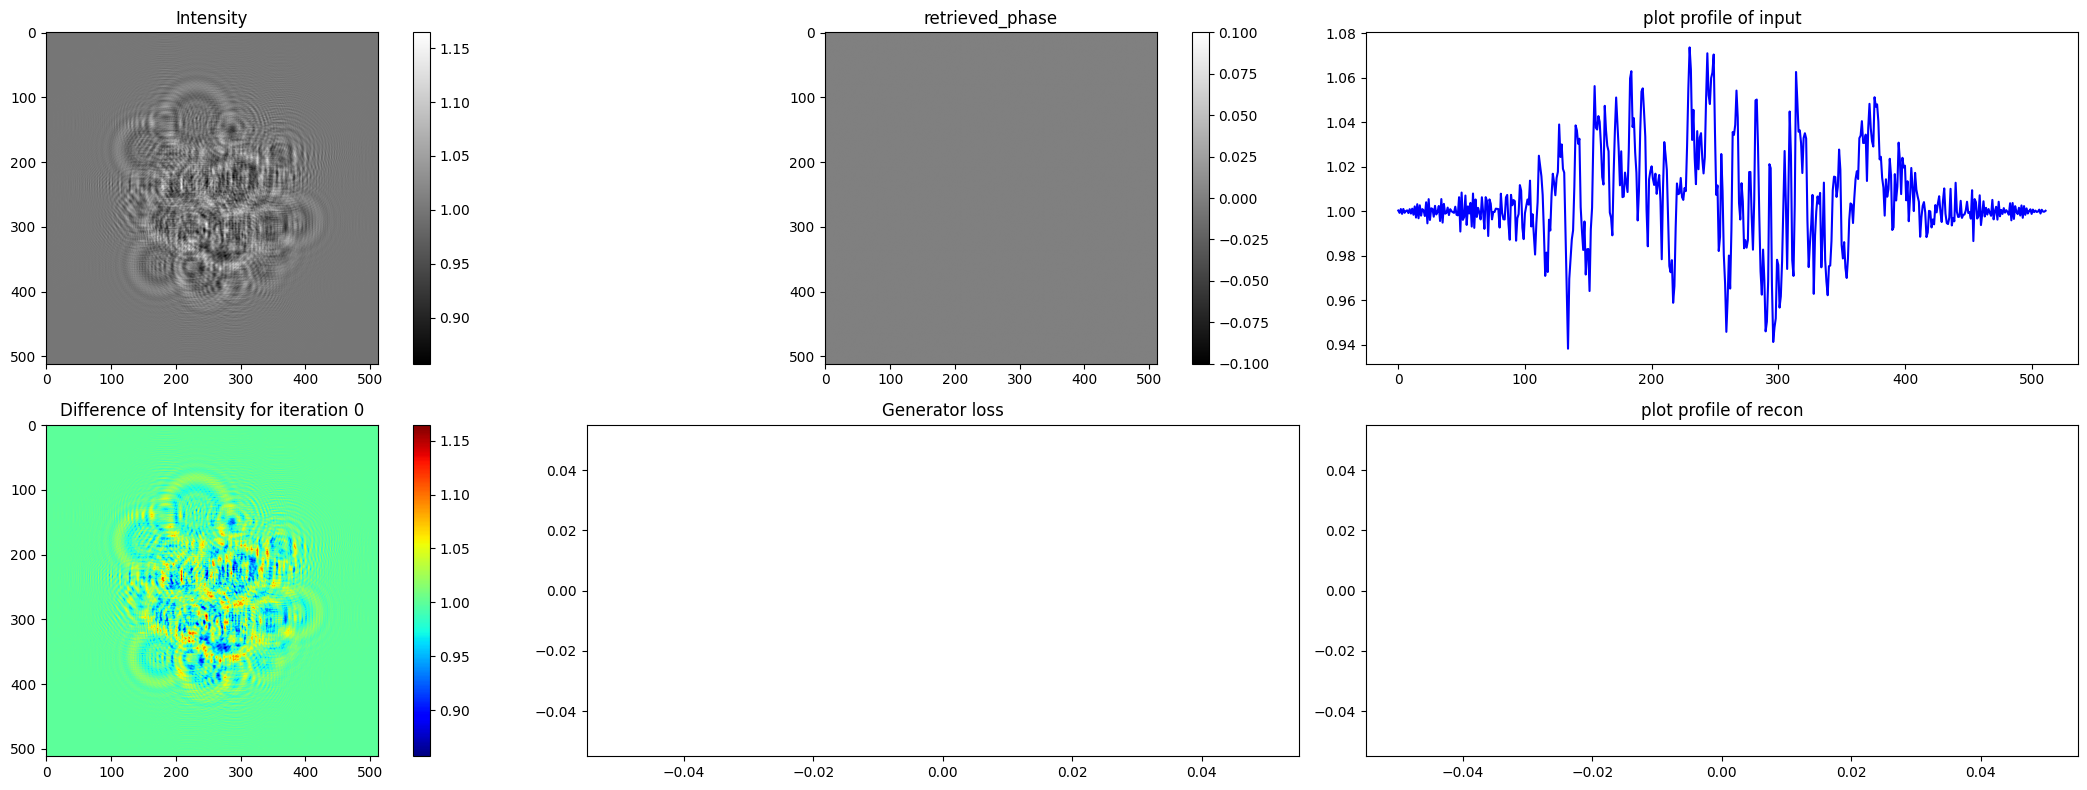

In [32]:
from models import make_generator, make_discriminator, make_filter
from utils import RECONmonitor, ffactor, fresnel_operator
from skimage.exposure import equalize_hist, equalize_adapthist, rescale_intensity, match_histograms

import skimage.io as io

import tensorflow as tf
import os
import numpy as np
import time

from IPython import display
class RECONmonitor:
    def __init__(self, recon_target):
        self.fig, self.axs = plt.subplots(2, 3, figsize=(23, 8))
        self.recon_target = recon_target
        if self.recon_target == 'tomo':
            self.plot_txt = 'Sinogram'
        elif self.recon_target == 'phase':
            self.plot_txt = 'Intensity'

    def initial_plot(self, img_input):
        px, py = img_input.shape
        self.im0 = self.axs[0, 0].imshow(img_input, cmap='gray')
        self.axs[0, 0].set_title(self.plot_txt)
        self.fig.colorbar(self.im0, ax=self.axs[0, 0])
        self.axs[0, 0].set_aspect('equal','box')
        self.im1 = self.axs[1, 0].imshow(img_input, cmap='jet')
        self.tx1 = self.axs[1, 0].set_title('Difference of ' + self.plot_txt + ' for iteration 0')
        self.fig.colorbar(self.im1, ax=self.axs[1, 0])
        self.axs[0, 0].set_aspect('equal')
        self.im2 = self.axs[0, 1].imshow(np.zeros((px, py)), cmap='gray')
        self.fig.colorbar(self.im2, ax=self.axs[0, 1])
        self.axs[0, 1].set_title('retrieved_phase')
        self.im3, = self.axs[1, 1].plot([], [], 'r-')
        self.axs[1, 1].set_title('Generator loss')
        self.axs[0, 2].set_title('plot profile of input')
        self.axs[0, 2].plot(img_input[int(px/2), :], 'b-')
        self.axs[0, 2].set_title('plot profile of input')
        self.im4 = self.axs[1, 2].plot([], 'r-')
        self.axs[1, 2].set_title('plot profile of recon')
        
        
        plt.tight_layout()

    def update_plot(self, epoch, img_diff, img_rec, plot_x, plot_loss, save_path = None):
        self.tx1.set_text('Difference of ' + self.plot_txt + ' for iteration {0}'.format(epoch))
        vmax = np.max(img_diff)
        vmin = np.min(img_diff)
        self.im1.set_data(img_diff)
        self.im1.set_clim(vmin, vmax)
        self.im2.set_data(img_rec)
        vmax = np.max(img_rec)
        vmin = np.min(img_rec)
        self.im2.set_clim(vmin, vmax)
        self.axs[1, 1].plot(plot_x, plot_loss, 'r-')
        self.axs[1, 2].plot(img_rec[int(img_rec.shape[0]/2), :], 'r-')
        plt.pause(0.1)

    def close_plot(self):
        plt.close()
# @tf.function
def discriminator_loss(real_output, fake_output):
    real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=real_output,
                                                                       labels=tf.ones_like(real_output)))
    fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output,
                                                                       labels=tf.zeros_like(fake_output)))
    total_loss = real_loss + fake_loss
    return total_loss


def l1_loss(img1, img2):
    return tf.reduce_mean(tf.abs(img1 - img2))
def l2_loss(img1, img2):
    return tf.square(tf.reduce_mean(tf.abs(img1-img2)))



# @tf.function
def generator_loss(fake_output, img_output, pred, l1_ratio):
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output,
                                                                      labels=tf.ones_like(fake_output))) \
               + l1_loss(img_output, pred) * l1_ratio
    return gen_loss


# @tf.function
def filer_loss(fake_output, img_output, img_filter):
    f_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=fake_output,
                                                                    labels=tf.ones_like(fake_output))) + \
              l1_loss(img_output, img_filter) *10
              # l1_loss(img_output, img_filter) * 10
    return f_loss



def tfnor_phase(img):
    img = tf.image.per_image_standardization(img)
    img = img / tf.reduce_max(img)
    return img

import tensorflow as tf
def tf_reshape(img):
    """
    output: [1, img.shape[0], img.shape[1], 1]
    """
    try:
        img = tf.convert_to_tensor(img)
        return tf.cast(tf.reshape(img, [1, img.shape[0], img.shape[1], 1]), dtype=tf.float32)
    except:
        if type(img) is np.ndarray or type(img) is tf.Tensor:
            if len(img.shape) == 2:
                img = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
        elif type(img) is list:
            if len(img[0].shape) == 2:
                img = tf.stack([tf_reshape(i) for i in img])
                img = tf.reshape(img, [img.shape[0], img.shape[1], img.shape[2], 1])
        else:
            try:
                img = img.numpy()
                img = tf_reshape(img)
            except:
                raise TypeError("img must be a list, np.ndarray or tf.Tensor")
        img = tf.cast(img, dtype=tf.float32)
        return img


def tfnor_phase(img):
    img = tf.image.per_image_standardization(tf_reshape(img))
    img = img / tf.reduce_max(img)
    img = tf.reshape(img, [img.shape[0], img.shape[1], img.shape[2], 1])
    return img

def tfback_phase(img, input):
    tf.config.run_functions_eagerly(True)
    img = tf_reshape(img)[0,:,:,0].numpy()
    input = tf_reshape(input)[0,:,:,0].numpy()
    matched = match_histograms(img, input)
    # visualize([img, input, matched])
    return tf_reshape(matched)
    # img_final = tf.numpy_function(match_histograms, [img, input], tf.float32)
    # visualize([img, input, img_final])
    # return tf_reshape(img_final)
    
#contrast limited adaptive histogram equalization
def tf_equalize(img):
    img = tf.image.equalize_adapthist(tf_reshape(img)[0,:,:,0])
    img = tf_reshape(img)
    return img




def FresnelPropagator(phase, absorption, ff, ref_image = None, dark_image = None):
    """  Parameters: 
            E0 - initial complex field in x-y source plane
            detector_pixel_size - pixel size in microns
            lambda0 - wavelength in nm
            distance_sample_detector - distance_sample_detector-value (distance from sensor to object)
            background - optional background image to divide out from
        
        Returns: E1 - propagated complex field in x-y sensor plane"""  
    import os
    dtype = tf.complex64
    H = tf.cast(ff, dtype)
    detector_wavefield = tf.exp(tf.complex(-absorption, phase))
    detector_wavefield = tf.cast(detector_wavefield, dtype)
    # Compute FFT centered about 0
    E0fft = (tf.signal.fft2d(detector_wavefield))
    E0fft = tf.cast(E0fft, dtype)

    # Multiply spectrum with fresnel phase-factor
    print("E0fft shape: ", E0fft.shape, "H shape: ", H.shape)
    G = H * E0fft
    # Ef = tf.signal.ifft2d(tf.signal.ifftshift(G)) # Output after deshifting Fourier transform
    I = tf.abs(tf.signal.ifft2d(G))**2
    I = tf.cast(I, tf.float32)
    if dark_image is not None and ref_image is not None:
        I = I * (ref_image - dark_image) + dark_image
    I = tf_reshape(I) #without normalizing
    # I = tfnor_phase(tf.reshape(I, [1, I.shape[0], I.shape[1], 1]))
    return I

def phase_fresnel(phase, absorption, ff, shape_x, shape_y):
    paddings = tf.constant([[shape_x // 2, shape_y // 2], [shape_x //2, shape_y // 2]])
    pvalue = tf.reduce_mean(phase[:100, :])
    phase = tf.pad(phase, paddings, 'SYMMETRIC')
    absorption = tf.pad(absorption, paddings, 'SYMMETRIC')
    abfs = tf.complex(-absorption, phase)
    abfs = tf.exp(abfs)
    ifp = tf.abs(tf.signal.ifft2d(ff * tf.signal.fft2d(abfs))) ** 2
    ifp = tf.reshape(ifp, [ifp.shape[0], ifp.shape[1], 1])
    ifp = tf.image.central_crop(ifp, 0.5)
    ifp = tf.reshape(ifp, [1, ifp.shape[0], ifp.shape[1], 1])
    ifp = tfnor_phase(ifp)
    return ifp


def ssim_check(image, rec, ff, distance_sample_detector):
    shape_x, shape_y = image.shape
    propagated = FresnelPropagator(rec[1], rec[0], ff, distance_sample_detector)
    data_im = tfnor_phase(tf.reshape(image, [1, shape_x, shape_y, 1]))
    ssim = tf.image.ssim(data_im, propagated, max_val = 1.0)
    print("SSIM between the input image and the reconstructed image is {}".format(ssim))
    return ssim

def peak_signal_to_noise(image, rec_phantom, ff, distance_sample_detector):
    shape_x, shape_y = image.shape
    propagated = FresnelPropagator(rec_phantom[1], rec_phantom[0], ff, distance_sample_detector)
    data_im = tfnor_phase(tf.reshape(image, [1, shape_x, shape_y, 1]))
    # visualize_interact([propagated[0,:,:,0], data_im[0,:,:,0]])
    psnr = tf.image.psnr(data_im, propagated, max_val = 1.0)
    print("Noise to signal ratio is {}".format(psnr))
    return psnr


class GANphase():
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        #transform type can be reshape or normalize
        if 'transform_type' not in kwargs:
            self.transform_type = 'normalize'

        if self.transform_type  == 'reshape':
            self.transform_func = tf_reshape 
        elif self.transform_type  == 'normalize':
            self.transform_func = tfnor_phase
        elif self.transform_type  == 'standardize':
            self.transform_func = tf.image.per_image_standardization
        elif self.transform_type == 'contrast':
            factor = 0.7
            self.transform_func = lambda x: tf.image.adjust_contrast(x, factor)
        elif self.transform_type == 'equalize':
            self.transform_func = tf_equalize

        self.transformed_image = self.transform_func(self.image)[0,:,:,0]
        super(GANphase, self).__init__()
        
    def make_model(self):
        if self.filter is True:
            self.filter = make_filter(self.transformed_image.shape[0],
                                  self.transformed_image.shape[1])
        self.generator = make_generator(self.transformed_image.shape[0],
                                        self.transformed_image.shape[1],
                                        self.conv_num,
                                        self.conv_size,
                                        self.dropout,
                                        2)
        self.discriminator = make_discriminator(self.transformed_image.shape[0],
                                                self.transformed_image.shape[1])
        self.filter_optimizer = tf.keras.optimizers.Adam(5e-3)
        self.generator_optimizer = tf.keras.optimizers.Adam(self.g_learning_rate)
        self.discriminator_optimizer = tf.keras.optimizers.Adam(self.d_learning_rate)

    def make_chechpoints(self):
        checkpoint_dir = '/data/ganrec/training_checkpoints'
        checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
        checkpoint = tf.train.Checkpoint(generator_optimizer=self.generator_optimizer,
                                         discriminator_optimizer=self.discriminator_optimizer,
                                         generator=self.generator,
                                         discriminator=self.discriminator)

    @tf.function
    def rec_step(self, transformed_image, ff):
        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            recon = self.generator(transformed_image)
            # recon = tfa.image.median_filter2d(recon)
            phase = tfnor_phase(recon[:, :, :, 0]) 
            phase = tf.reshape(phase, [self.shape_x, self.shape_y])
            absorption = (tfnor_phase(recon[:, :, :, 1]))* self.abs_ratio 
            absorption = tf.reshape(absorption, [self.shape_x, self.shape_y])
            if self.phase_only:
                absorption = tf.zeros_like(phase)
            # i_rec = tfnor_phase(tf.reshape(FresnelPropagator(phase, absorption, ff, ref_image = None, dark_image = None), [1, self.shape_x, self.shape_y, 1]))
            propagated = FresnelPropagator(phase, absorption, ff, ref_image = None, dark_image = None)
            if self.transform_type == 'reshape':
                i_rec = tf_reshape(tfback_phase(propagated, transformed_image))
            else:
                i_rec = self.transform_func(propagated)

            real_output = self.discriminator(transformed_image, training=True)
            fake_output = self.discriminator(i_rec, training=True)
            
            g_loss = generator_loss(fake_output, transformed_image, i_rec, self.l1_ratio)
            d_loss = discriminator_loss(real_output, fake_output)
        
        # tf.config.run_functions_eagerly(False)
        gradients_of_generator = gen_tape.gradient(g_loss,
                                                   self.generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(d_loss,
                                                        self.discriminator.trainable_variables)
        self.generator_optimizer.apply_gradients(zip(gradients_of_generator,
                                                     self.generator.trainable_variables))
        self.discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,
                                                         self.discriminator.trainable_variables))


        return {'phase': phase,
                'absorption': absorption,
                'i_rec': i_rec,
                'g_loss': g_loss,
                'd_loss': d_loss}


    @property
    def recon(self):
        # ff = fresnel_operator(self.shape_x, self.shape_y, self.detector_pixel_size, self.distance_sample_detector, self.energy)
        ff = self.fresnel_factor
        transformed_image = tf_reshape(self.transformed_image)
        self.make_model()

        if self.init_model:
            self.generator.load_weights(self.init_wpath+'generator.h5')
            print('generator is initilized')
            self.discriminator.load_weights(self.init_wpath+'discriminator.h5')

        phase = np.zeros((self.iter_num, self.shape_x, self.shape_y))
        absorption = np.zeros((self.iter_num, self.shape_x, self.shape_y))
        gen_loss = np.zeros(self.iter_num)

        ###########################################################################
        # Reconstruction process monitor
        if self.recon_monitor:
            
            plot_x, plot_loss = [], []
            recon_monitor = RECONmonitor('phase')
            recon_monitor.initial_plot(self.transformed_image)
            # hdisplay = display.display("", display_id=True)
        ###########################################################################
        for epoch in range(self.iter_num):

            ###########################################################################
            ## Call the rconstruction step
            step_results = self.rec_step(transformed_image, ff)
            phase[epoch, :, :] = step_results['phase']
            absorption[epoch, :, :] = step_results['absorption']
            i_rec = step_results['i_rec']
            gen_loss[epoch] = step_results['g_loss']
            d_loss = step_results['d_loss']
            # phase[epoch, :, :], absorption[epoch, :, :], i_rec, gen_loss[epoch], d_loss = self.rec_step(transformed_image,
            #                                                                                                   ff)
            ###########################################################################

            plot_x.append(epoch)
            plot_loss = gen_loss[:epoch + 1]
            if (epoch + 1) % 100 == 0:
                # checkpoint.save(file_prefix=checkpoint_prefix)
                if recon_monitor:
                    i_rec = np.reshape(i_rec, (self.shape_x, self.shape_y))
                    i_diff = np.abs(i_rec - self.transformed_image)
                    phase_plt = np.reshape(phase[epoch], (self.shape_x, self.shape_y))
                    recon_monitor.update_plot(epoch, i_diff, phase_plt, plot_x, plot_loss, None)
                    # hdisplay.update(fig)
                    if self.save_wpath != None:
                        import skimage.io as io
                        io.imsave(self.save_wpath+ 'iter_' +str(epoch)+'.tif', phase_plt, check_contrast=False)
                        io.imsave(self.save_wpath+ 'iter_' +str(epoch)+'_diff.tif', i_diff, check_contrast=False)
                print('Iteration {}: G_loss is {} and D_loss is {}'.format(epoch + 1, gen_loss[epoch], d_loss.numpy()))
        recon_monitor.close_plot()
        
        if self.save_wpath != None:
            import skimage.io as io
            self.generator.save(self.init_wpath+'generator.h5')
            self.discriminator.save(self.init_wpath+'discriminator.h5')
            io.imsave(self.save_wpath+ 'final_phase_iter_' +str(self.iter_num)+'.tif', phase[epoch][1], check_contrast=False)
            io.imsave(self.save_wpath+ 'final_absorption_iter_' +str(self.iter_num)+'.tif', absorption[epoch][0], check_contrast=False)
        return absorption[epoch], phase[epoch], i_rec, gen_loss, d_loss

class Ganrec_Dataloader():
    def __init__(self,**kwargs):
        self.kwargs = kwargs
        self.kwargs.update(get_all_info(**kwargs))
        keys = self.kwargs.keys()
        [self.__setattr__(key, self.kwargs[key]) for key in keys]
        self.dims = (self.ND, self.shape_x, self.shape_y)
        self.transformed_images = None

        super(Ganrec_Dataloader, self).__init__()

    def __len__(self):
        return len(self.image_path)
    
    def __getitem__(self, idx = None):
        if idx is not None:
            kwargs = self.kwargs
            kwargs["idx"] = idx
            kwargs.update(get_all_info(**kwargs))
            keys = kwargs.keys()
            [self.__setattr__(key, kwargs[key]) for key in keys]
            
            if type(idx) is not list:    
                self.transformed_images = tfnor_phase(self.image)
            else:
                images = [tfnor_phase(self.image[i]) for i in range(len(self.idx))]
                self.transformed_images= tf.stack(images)
        else:
            if type(self.idx) is not list:
                self.transformed_images = tfnor_phase(self.image)
            else:
                self.transformed_images = tf.stack([tfnor_phase(self.image[i]) for i in range(len(self.idx))])
        return self.transformed_images
    def normalize(self, idx = None):
        image = self.__getitem__(idx)
        image = tfnor_phase(image)
        return image
    
    def get_kwargs(self):
        return self.__dict__
    
    def visualize(self, idx = None, random = False):
        if idx is not None:
            kwargs = self.kwargs
            kwargs["idx"] = idx
            kwargs.update(get_all_info(**kwargs))
            keys = kwargs.keys()
            [self.__setattr__(key, kwargs[key]) for key in keys]
            images = self.image
        else:
            images = self.image
        if type(images) is not list:
            images = [images]

        rows = int(np.sqrt(len(images)))
        if rows ==1:
            cols = len(images)
        else:
            cols = rows + 1
        print("rows: {}, cols: {}".format(rows, cols))
        if random == False:
            visualize(images, rows = rows, cols = cols)
        else:
            visualize(images, rows = rows, cols = cols, random=True)

    def normal_visualize(self, idx = None, random = False):
        if self.transformed_images is None:
            self.__getitem__(idx)
        print(self.transformed_images.shape)
        images = [self.transformed_images[i, :, :, 0].numpy() for i in range(self.transformed_images.shape[0])]
        rows = int(np.sqrt(len(images)))
        cols = rows + 1
        if random == False:    
            visualize(images, rows = rows, cols = cols, random = False )
        else:
            visualize(images, random=True)
    
    def create_ganphase_class(self, id = None, **kwargs):
        try:
            self.transformed_images
            if self.transformed_images is None:
                self.transformed_images = self.__getitem__(id)
        except:
            raise ValueError("transformed_images is not defined")

        self.kwargs['transformed_image'] = self.transformed_images[0, :, :, 0]
        self.ganphase = GANphase(**self.kwargs)
        return self.ganphase

    def train_model(self, id = None, **kwargs):
        if kwargs is not None:
            self.kwargs.update(kwargs)
        self.ganphase = self.create_ganphase_class(id, **self.kwargs)
        print("tranformed_images shape: {}".format(self.transformed_images.shape))
        self.retrieved = self.ganphase.recon
        self.phase = self.retrieved[1]
        self.attenuation = self.retrieved[0]
        return self.retrieved
    
    def forward_propagate(self, distance = None):
        assert self.ganphase is not None, "ganphase is not defined"
        if distance is None:
            distance = self.distance_sample_detector
        self.propagated_forward = FresnelPropagator(self.phase, self.attenuation, self.fresnel_factor, distance)
        return self.propagated_forward
    def ssim_check(self):
        intenstiy = FresnelPropagator(self.phase, self.attenuation, self.fresnel_factor, self.distance_sample_detector)
        #match
        intensity = tfback_phase(intensity, self.transformed_images[0,:,:,0])
        self.ssim_value = tf.image.ssim(self.transformed_images[0,:,:,0], intensity, max_val = 1.0)
        print("SSIM value is {}".format(self.ssim_value))
        return self.ssim_value

args["path"] = '/home/hailudaw/hailudaw/git_folders/ganrec/ganrectorch/data/localfiles'
args["idx"] = 2
# args["idx"] = 3
args["iter_num"] = 100
args["init_model"] = False
args['transform_type'] = 'reshape'
dataloader = Ganrec_Dataloader(**args)
ganphase = dataloader.create_ganphase_class()
retrieved = dataloader.train_model()


In [7]:
import nvidia.cudnn
display.display(nvidia.cudnn.__file__)


'/beegfs/desy/user/hailudaw/anacon/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/__init__.py'

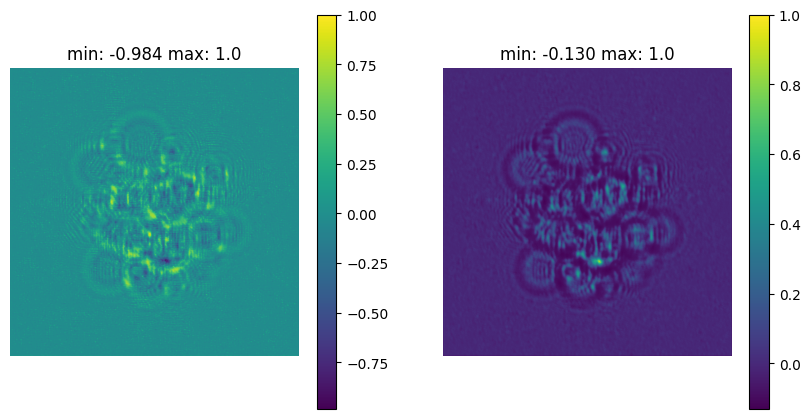

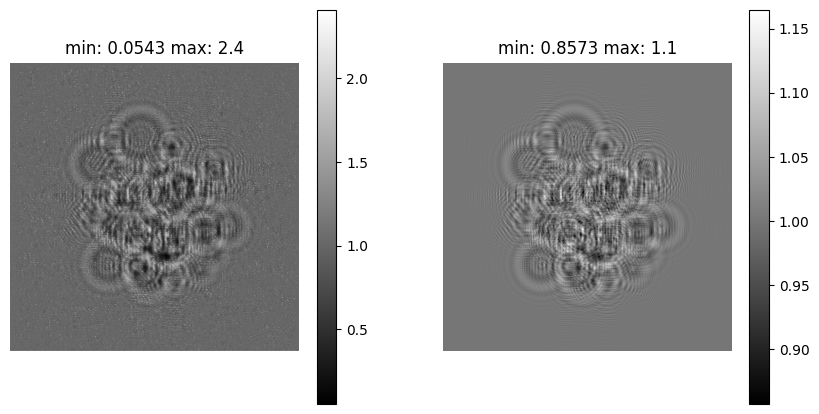

In [ ]:
phase = retrieved[1]
attenuation = retrieved[0]
propagated = FresnelPropagator(phase, attenuation, dataloader.kwargs['fresnel_factor'], ref_image = None, dark_image = None)
print("phase shape: {}".format(phase.shape))
print("attenuation shape: {}".format(attenuation.shape))
visualize([phase, attenuation])
visualize([propagated[0, :, :, 0], dataloader.image])

In [ ]:
matched = tfback_phase(dataloader.transformed_images[0,:,:,0], propagated[0,:,:,0])
tf.image.ssim(matched, propagated, max_val = 1.0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.43217903], dtype=float32)>

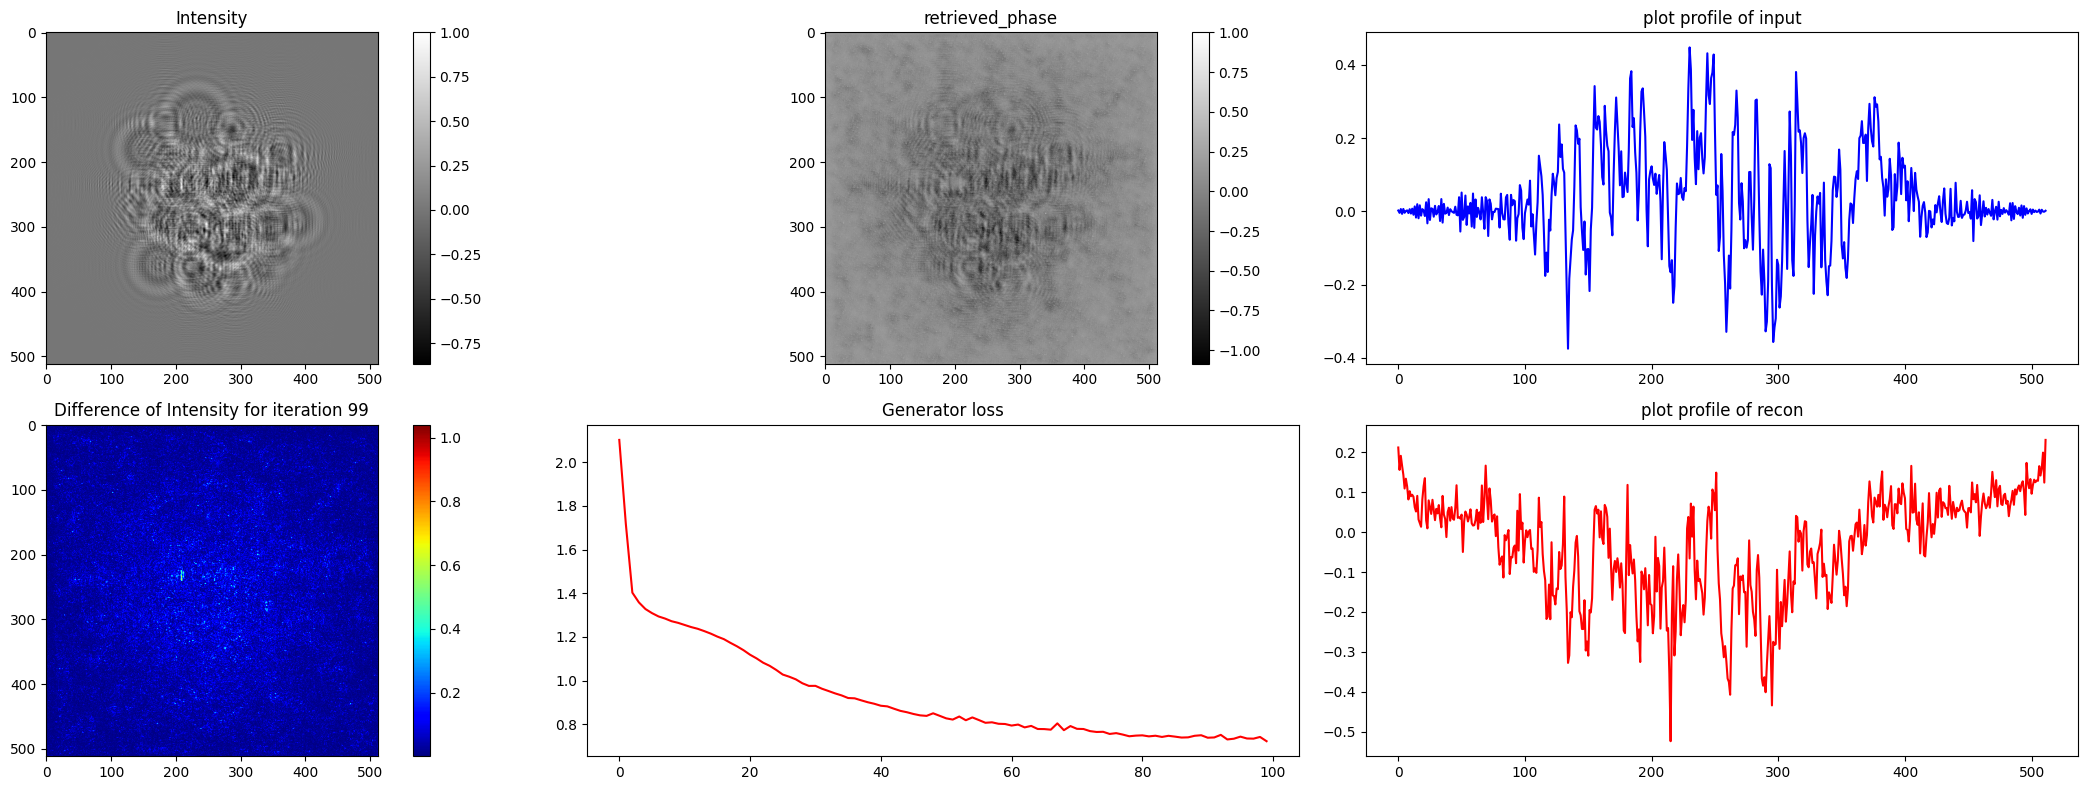

In [ ]:
args["path"] = '/home/hailudaw/hailudaw/git_folders/ganrec/ganrectorch/data/localfiles'
args["idx"] = 2
# args["idx"] = 3
args["iter_num"] = 200
args["init_model"] = False
args['transform_type'] = 'reshape'
dataloader = Ganrec_Dataloader(**args)
ganphase = dataloader.create_ganphase_class()
retrieved = dataloader.train_model()
